In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 23:25:35,600 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:35,602 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:35,603 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:35,605 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 23:25:35,606 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 23:25:35,617 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 23:25:35,910 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 23:25:35,997 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:35,999 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:36,001 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:36,005 - settings - Setting enable_python_native_blobs to True


Sleeping 79 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 23:25:36,315 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 8103


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012398582,0,0.25,29.00,0,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,333,193,13856190.93238171,7698561.170643449,24656.795,186.318,177.736,526.688,490.357,5195,0.0003749226627542612,15.6006006006006,8675139.424,177,0.0005988376377707425,29.35,911951270671.0396,95420451.33998108,65815.43767124508,105122.37626384453,5152267065.938077,5458.7971
864691135012471798,0,0.25,29.00,0,0,1,=BLOB=,879119,1793791,0,2,2,2,2,9,283,83,10497114.543519672,2577718.474621564,21129.674,99.883,99.883,462.738,399.451,2705,0.0002576898621793086,9.558303886925795,6119605.255,122,0.00044202197483079325,22.172,343672497908.9721,73909008.13184547,32739.71113529824,56159.25923133291,2816987687.77846,2996.3999
864691135012571126,0,0.25,29.00,0,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15004093.215539565,5950216.270015861,22562.141,138.374,138.374,464.441,411.031,5392,0.0003593686017903147,12.310502283105023,8644420.327,215,0.0006237549536038427,25.079,973808719997.8567,107423240.84708405,64902.87057063164,112651.70863525233,4529342883.710961,4656.7696
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,11

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:54:12
__neuron_split_suggestions,0cec0240576876905afc52bc010719e8,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:14:06
__neuron_split_suggestions,0e5cd6eab1b5f2e550cf30b458e990cf,error,=BLOB=,Exception: base_node (101) and upstream_node (136) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10479,36037,2021-01-13 16:57:56
__neuron_split_suggestions,13123179026cc7faebd655f15ef45844,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:59:28
__neuron_split_suggestions,29ef90c9bf67783e41258c6e923a177d,error,=BLOB=,Exception: base_node (68) and upstream_node (81) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10353,36034,2021-01-13 16:19:57
__neuron_split_suggestions,4b8616de1575f9dcfef86e69b2cdd0bc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10416,36035,2021-01-13 16:30:20
__neuron_split_suggestions,4dd62a4a7f6e893aafc470b844f03f12,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 17:05:09
__neuron_split_suggestions,65b1c94a2d494e3c7f6a1481c5c8d6d0,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,23989,36204,2021-01-13 17:25:29
__neuron_split_suggestions,8e765a57fcf0e32ace865a137199826e,error,=BLOB=,Exception: base_node (34) and upstream_node (28) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 16:32:42
__neuron_split_suggestions,962778371ff53114b0f9fac08fb862dc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:29:14


INFO - 2021-01-13 23:25:36,454 - autopopulate - Found 121 keys to populate
INFO - 2021-01-13 23:25:36,473 - connection - Transaction started
INFO - 2021-01-13 23:25:36,475 - autopopulate - Populating: {'segment_id': 864691136390485119, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691136390485119-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0 1]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 46 107]
 [ 46 126]
 [107 126]]


---- working on disconnecting 46 and 107
---- This disconnects S1_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [46, 47, 49, 56, 63, 94, 106, 123, 27, 23, 107]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 13  19  23  27  28  39  43  47  49  55  56  63  93  94 105 106 122 123
 124]
Short segments to combine = []
Found 0 high degree coordinates to cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [46 47]: curr_angle = 50.41
  Edge: [47 49]: curr_angle = 25.55
  Edge: [49 56]: curr_angle = 16.22
  Edge: [56 63]: curr_angle = 58.11
  Edge: [63 94]: curr_angle = 44.31
  Edge: [ 94 106]: curr_angle = 48.16
  Edge: [106 123]: curr_angle = 93.15
  Edge: [123  27]: curr_angle = 115.21
  Edge: [27 23]: curr_angle = 25.43
  Edge: [ 23 107]: curr_angle = 44.7

Total time for doubling_back = 1.083298921585083
There were 1 edges that passed doubling back threshold of 100
Winning edge [123  27] had a doubling back of 115.21295284260624
***inside resolve crossover!!!!****
coordinate_branches = [27, 123, 124]
27 = red
123 = aqua
124 = purple
Angle between 27 and 123 = 95.33 
Angle between 27 and 124 = 58.23 
Angle between 123 and 124 = 26.62 
Final Matches = [[123, 124]]
matched_branches_revised = [[123, 124]]
Original graph


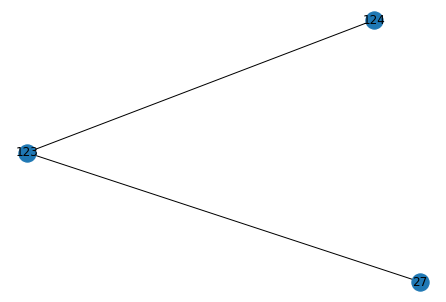

match_branches = [[123, 124]]
edges_to_delete (resolve crossover) = [[27, 123], [27, 124]]
edges_to_create (resolve crossover) = [[123, 124]]
edges_to_delete (cut_limb_network) = [array([ 27, 123]), array([ 27, 124])]
edges_to_create = [[123, 124]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166}
Co

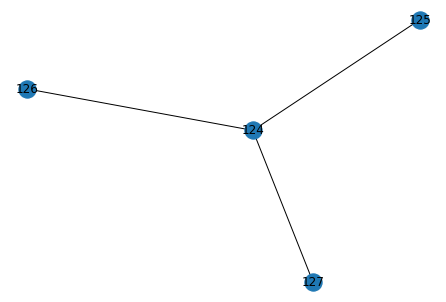

match_branches = [[124, 126]]
edges_to_delete (resolve crossover) = [[124, 125], [124, 127], [125, 126], [125, 127], [126, 127]]
edges_to_create (resolve crossover) = [[124, 126]]
curr_limb.deleted_edges 5 =[array([ 27, 123]), array([ 27, 124])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[124, 125], [124, 127], [125, 126], [125, 127], [126, 127]]
edges_to_create = [[124, 126]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 

  Edge: [46 47]: curr_angle = 50.41
  Edge: [47 49]: curr_angle = 25.55
  Edge: [49 56]: curr_angle = 16.22
  Edge: [56 63]: curr_angle = 58.11
  Edge: [63 94]: curr_angle = 44.31
  Edge: [ 94 106]: curr_angle = 48.16
  Edge: [106 123]: curr_angle = 93.15
  Edge: [123 124]: curr_angle = 17.91
  Edge: [124 126]: curr_angle = 15.01

Total time for doubling_back = 1.1335642337799072

Attempting the width jump check (attempting from both sides)
  Edge: [46 47]: jump = -287.05
  Edge: [47 49]: jump = -381.77
  Edge: [49 56]: jump = -108.04
  Edge: [56 63]: jump = -117.13
  Edge: [63 94]: jump = 54.52
  Edge: [ 94 106]: jump = 209.41
Adding error edge [ 94 106] because width jump was 209.41309186922064
  Edge: [106 123]: jump = 598.06
Adding error edge [106 123] because width jump was 598.0603448310517
  Edge: [123 124]: jump = 78.89
  Edge: [124 126]: jump = 180.52
Total time for width = 0.980003833770752
Path starting at 46 had err_edges: [[94, 106], [106, 123]]
  Edge: [126 124]: jump = -

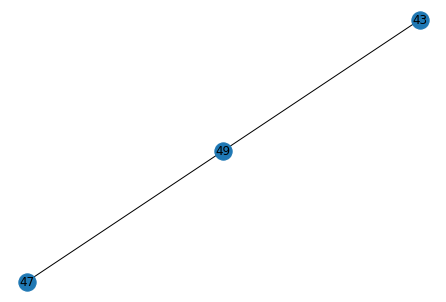

match_branches = []
edges_to_delete (resolve crossover) = [[43, 47], [43, 49], [47, 49]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([43, 47]), array([43, 49]), array([47, 49])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {1, 2, 26, 4, 39, 40, 46, 47, 14, 50, 20, 58, 61}
Comp 1 = {0, 3, 5, 6, 7, 8, 10, 11, 12, 15, 16, 17, 18, 21, 22, 24, 25, 29, 30, 31, 33, 34, 35, 36, 41, 42, 43, 44, 45, 51, 53, 54, 57, 59, 60, 64, 68, 69, 70, 72, 84, 85, 96, 97, 98, 99, 100, 102, 103, 108, 111, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166}
Comp 2 = {130, 131, 9, 28, 32, 37, 38, 48, 49, 52, 55, 56, 62, 63, 65, 66, 67, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 104, 105, 106, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126}
Comp 3 = {107, 13, 19

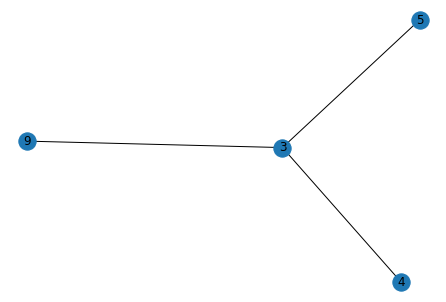

match_branches = [[4, 5], [3, 9]]
edges_to_delete (resolve crossover) = [[3, 4], [3, 5], [4, 9], [5, 9]]
edges_to_create (resolve crossover) = [[4, 5], [3, 9]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 4], [3, 5], [4, 9], [5, 9]]
edges_to_create = [[4, 5], [3, 9]]
Number of connected components = 2
Comp 0 = {0, 4, 5, 6, 7, 8}
Comp 1 = {1, 2, 3, 9, 10, 11}
curr_limb_copy.deleted_edges = [[3, 4], [3, 5], [4, 9], [5, 9]]
curr_limb_copy.created_edges = [[4, 5], [3, 9]]
After get best cut: cut_edges = [[3, 4], [3, 5], [4, 9], [5, 9]], added_edges = [[4, 5], [3, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 4, 5, 6, 7, 8]), array([ 1,  2,  3,  9, 10, 11])]


 --

  Edge: [37 30]: curr_angle = 22.13
  Edge: [30 24]: curr_angle = 29.76
  Edge: [24 25]: curr_angle = 35.4
  Edge: [25 26]: curr_angle = 31.27
  Edge: [26 29]: curr_angle = 1.59
  Edge: [29 31]: curr_angle = 48.54
  Edge: [31 43]: curr_angle = 62.28
  Edge: [43 34]: curr_angle = 20.01
  Edge: [34 48]: curr_angle = 37.46
  Edge: [48 39]: curr_angle = 47.51
  Edge: [39 35]: curr_angle = 22.11
  Edge: [35 32]: curr_angle = 27.07
  Edge: [32 33]: curr_angle = 32.05
  Edge: [33 42]: curr_angle = 25.16

Total time for doubling_back = 1.03629469871521

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -131.81
  Edge: [30 24]: jump = -190.54
  Edge: [24 25]: jump = -142.99
  Edge: [25 26]: jump = 80.15
  Edge: [26 29]: jump = -164.78
  Edge: [29 31]: jump = -168.61
  Edge: [31 43]: jump = 19.41
  Edge: [43 34]: jump = 22.37
  Edge: [34 48]: jump = 10.88
  Edge: [48 39]: jump = 165.07
  Edge: [39 35]: jump = 197.32
  Edge: [35 32]: jump = -25.54
  Edge: [32 33

  Edge: [37 30]: curr_angle = 22.13
  Edge: [30 24]: curr_angle = 29.76
  Edge: [24 25]: curr_angle = 35.4
  Edge: [25 26]: curr_angle = 31.27
  Edge: [26 29]: curr_angle = 1.59
  Edge: [29 31]: curr_angle = 48.54
  Edge: [31 43]: curr_angle = 62.28
  Edge: [43 36]: curr_angle = 74.02
  Edge: [36 61]: curr_angle = 16.51
  Edge: [61 59]: curr_angle = 8.84
  Edge: [59 69]: curr_angle = 15.98
  Edge: [69 63]: curr_angle = 27.56
  Edge: [63 64]: curr_angle = 32.09

Total time for doubling_back = 2.555112838745117

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -131.81
  Edge: [30 24]: jump = -190.54
  Edge: [24 25]: jump = -142.99
  Edge: [25 26]: jump = 80.15
  Edge: [26 29]: jump = -164.78
  Edge: [29 31]: jump = -168.61
  Edge: [31 43]: jump = 19.41
  Edge: [43 36]: jump = -186.38
  Edge: [36 61]: jump = 51.01
  Edge: [61 59]: jump = 187.0
  Edge: [59 69]: jump = 87.55
  Edge: [69 63]: jump = 6.17
  Edge: [63 64]: jump = -47.95
Total time for width 

  Edge: [42 33]: curr_angle = 25.16
  Edge: [33 32]: curr_angle = 32.05
  Edge: [32 35]: curr_angle = 27.07
  Edge: [35 39]: curr_angle = 22.11
  Edge: [39 48]: curr_angle = 47.51
  Edge: [48 34]: curr_angle = 37.46
  Edge: [34 36]: curr_angle = 86.91
  Edge: [36 61]: curr_angle = 16.51
  Edge: [61 59]: curr_angle = 8.84
  Edge: [59 69]: curr_angle = 15.98
  Edge: [69 63]: curr_angle = 27.56
  Edge: [63 64]: curr_angle = 32.09

Total time for doubling_back = 4.035026788711548

Attempting the width jump check (attempting from both sides)
  Edge: [42 33]: jump = -92.02
  Edge: [33 32]: jump = -98.19
  Edge: [32 35]: jump = 25.54
  Edge: [35 39]: jump = -197.32
  Edge: [39 48]: jump = -165.07
  Edge: [48 34]: jump = -10.88
  Edge: [34 36]: jump = -208.75
  Edge: [36 61]: jump = 51.01
  Edge: [61 59]: jump = 187.0
  Edge: [59 69]: jump = 87.55
  Edge: [69 63]: jump = 6.17
  Edge: [63 64]: jump = -47.95
Total time for width = 2.4295382499694824
Path starting at 42 had err_edges: []
  Edge: 

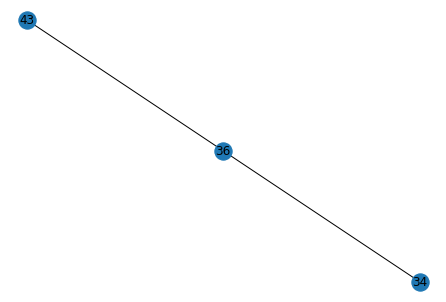

match_branches = [[34, 43]]
edges_to_delete (resolve crossover) = [[34, 36], [36, 43]]
edges_to_create (resolve crossover) = [[34, 43]]
edges_to_delete (cut_limb_network) = [array([34, 36]), array([36, 43])]
edges_to_create = [[34, 43]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 65}
Comp 1 = {64, 66, 67, 36, 69, 70, 71, 72, 68, 73, 74, 6, 75, 76, 77, 59, 60, 61, 62, 63}
curr_limb_copy.deleted_edges = [array([34, 36]), array([36, 43])]
curr_limb_copy.created_edges = [[34, 43]]
After get best cut: cut_edges = [array([34, 36]), array([36, 43])], added_edges = [[34, 43]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER D

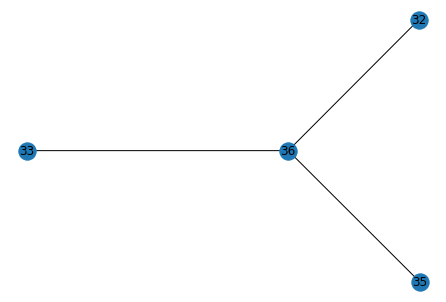

match_branches = [[33, 35], [32, 36]]
edges_to_delete (resolve crossover) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create (resolve crossover) = [[33, 35], [32, 36]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 42 because skeletal distance was 627.4412235887919 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create = [[33, 35], [32, 36]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36]]
curr_limb_copy.created_edges = [[33, 35], [32, 36]]
After get best cut: cut_edges = [[32, 33], [32, 35], [33, 36], [35, 36]], added_edges = [[33, 35], [32, 36]]
total_so

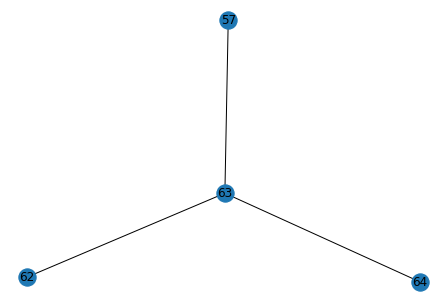

match_branches = [[62, 63], [57, 64]]
edges_to_delete (resolve crossover) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create (resolve crossover) = [[62, 63], [57, 64]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36]]
Skipping endnode 42 because skeletal distance was 627.4412235887919 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create = [[62, 63], [57, 64]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 45, 48, 49, 51, 55, 58, 59, 60, 61, 62, 63, 65, 66}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {64, 67, 43, 44, 46, 47, 50, 52, 53, 54, 56, 57}
Comp 3 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
curr_limb_copy.created_edges = [[33, 35], [32, 36], [62, 63], [57, 64]]
After get

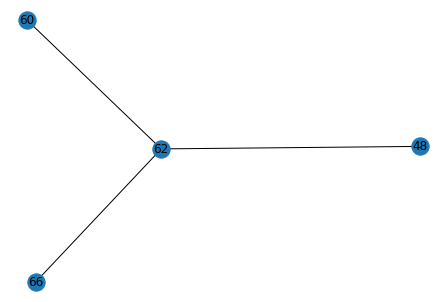

match_branches = [[60, 66]]
edges_to_delete (resolve crossover) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create (resolve crossover) = [[60, 66]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
Skipping endnode 42 because skeletal distance was 627.4412235887919 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create = [[60, 66]]
Number of connected components = 6
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 45, 49, 51, 58, 59, 62, 63, 65}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {64, 67, 43, 44, 46, 47, 50, 52, 53, 54, 56, 57}
Comp 3 = {48}
Comp 4 = {66, 60, 61, 55}
Comp 5 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64], [48, 60], [48, 62], [48, 66], [

  Edge: [11  7]: curr_angle = 124.49
  Edge: [7 8]: curr_angle = 79.75
  Edge: [ 8 17]: curr_angle = 82.5
  Edge: [17 14]: curr_angle = 13.66
  Edge: [14 15]: curr_angle = 42.68

Total time for doubling_back = 0.43175625801086426
There were 1 edges that passed doubling back threshold of 100
Winning edge [11  7] had a doubling back of 124.4947667302454
***inside resolve crossover!!!!****
coordinate_branches = [5, 7, 11]
5 = red
7 = aqua
11 = purple
Angle between 5 and 7 = 68.94 
Angle between 5 and 11 = 30.67 
Angle between 7 and 11 = 118.91 
Final Matches = [[5, 11]]
matched_branches_revised = [[5, 11]]
Original graph


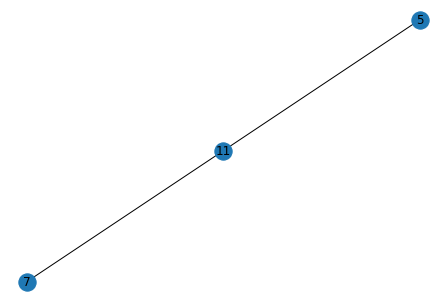

match_branches = [[5, 11]]
edges_to_delete (resolve crossover) = [[5, 7], [7, 11]]
edges_to_create (resolve crossover) = [[5, 11]]
edges_to_delete (cut_limb_network) = [array([5, 7]), array([ 7, 11])]
edges_to_create = [[5, 11]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18}
Comp 1 = {11, 5}
curr_limb_copy.deleted_edges = [array([5, 7]), array([ 7, 11])]
curr_limb_copy.created_edges = [[5, 11]]
After get best cut: cut_edges = [array([5, 7]), array([ 7, 11])], added_edges = [[5, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18]), array([11,  5])]


 ------ Total time for Splitting 8646

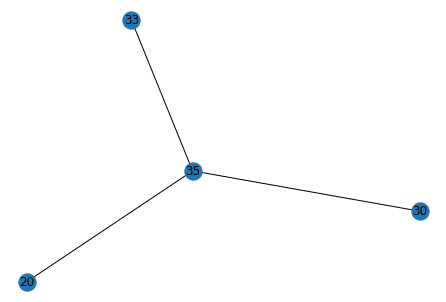

match_branches = []
edges_to_delete (resolve crossover) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {34}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
To

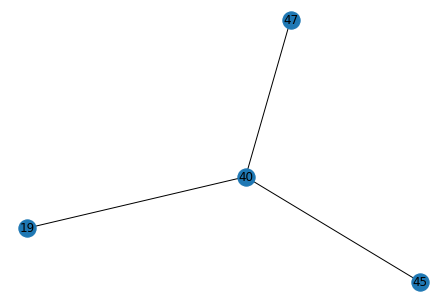

match_branches = [[40, 45], [19, 47]]
edges_to_delete (resolve crossover) = [[19, 40], [19, 45], [40, 47], [45, 47]]
edges_to_create (resolve crossover) = [[40, 45], [19, 47]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 40], [19, 45], [40, 47], [45, 47]]
edges_to_create = [[40, 45], [19, 47]]
Number of connected components = 7
Comp 0 = {11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 5 = {34}
Comp 6 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47]]
curr_limb_copy.created_edges = [[40, 45], [19, 47]]
After get best cut: cut_edges = [[19, 40], [

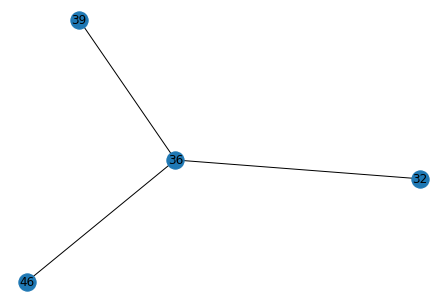

match_branches = [[32, 39], [36, 46]]
edges_to_delete (resolve crossover) = [[32, 36], [32, 46], [36, 39], [39, 46]]
edges_to_create (resolve crossover) = [[32, 39], [36, 46]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 36], [32, 46], [36, 39], [39, 46]]
edges_to_create = [[32, 39], [36, 46]]
Number of connected components = 8
Comp 0 = {11, 12, 13, 14, 24, 25, 26, 29, 31, 35, 36, 37, 38, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {32, 64, 39, 40, 41, 42, 43, 44, 45, 15, 48, 17, 16, 23, 21, 54, 55, 28, 63}
Comp 5 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 6 = {34}
Comp 7 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47], [32, 36], [32, 46], [36, 39], [39, 46]]
curr_l

  Edge: [29 24]: curr_angle = 28.98
  Edge: [24 25]: curr_angle = 92.32
  Edge: [25 26]: curr_angle = 70.14
  Edge: [26 53]: curr_angle = 38.08
  Edge: [53 57]: curr_angle = 22.21
  Edge: [57 59]: curr_angle = 33.1
  Edge: [59 61]: curr_angle = 18.87

Total time for doubling_back = 0.3495981693267822

Attempting the width jump check (attempting from both sides)
  Edge: [29 24]: jump = -53.99
  Edge: [24 25]: jump = -209.93
  Edge: [25 26]: jump = 166.25
  Edge: [26 53]: jump = 220.41
Adding error edge [26 53] because width jump was 220.4108954056142
  Edge: [53 57]: jump = -5.53
  Edge: [57 59]: jump = 82.33
  Edge: [59 61]: jump = 291.45
Adding error edge [59 61] because width jump was 291.44947347312973
Total time for width = 0.28225159645080566
Path starting at 29 had err_edges: [[26, 53], [59, 61]]
  Edge: [61 59]: jump = -482.6
  Edge: [59 57]: jump = -44.67
  Edge: [57 53]: jump = -32.28
  Edge: [53 26]: jump = -220.41
  Edge: [26 25]: jump = -198.89
  Edge: [25 24]: jump = 209.9

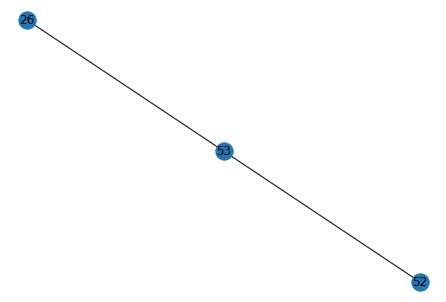

match_branches = [[52, 53]]
edges_to_delete (resolve crossover) = [[26, 52], [26, 53]]
edges_to_create (resolve crossover) = [[52, 53]]
edges_to_delete (cut_limb_network) = [array([26, 52]), array([26, 53])]
edges_to_create = [[52, 53]]
Number of connected components = 9
Comp 0 = {13, 31, 35, 36, 37, 38, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68}
Comp 1 = {11, 12, 14, 24, 25, 26, 29}
Comp 2 = {20}
Comp 3 = {27, 30, 22}
Comp 4 = {33}
Comp 5 = {32, 64, 39, 40, 41, 42, 43, 44, 45, 15, 48, 17, 16, 23, 21, 54, 55, 28, 63}
Comp 6 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 7 = {34}
Comp 8 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47], [32, 36], [32, 46], [36, 39], [39, 46], array([26, 52]), array([26, 53])]
curr_limb_copy.created_edges = [[40, 45], [19, 47], [32, 39], [36, 46], [52, 53]]
After get best cut: cut_edges = [array([26, 52]), array([26, 53])], added_edges 

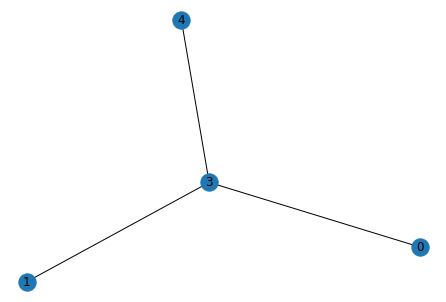

match_branches = [[0, 4], [1, 3]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 3], [1, 4], [3, 4]]
edges_to_create (resolve crossover) = [[0, 4], [1, 3]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 3], [1, 4], [3, 4]]
edges_to_create = [[0, 4], [1, 3]]
Number of connected components = 2
Comp 0 = {1, 3}
Comp 1 = {0, 2, 4, 5, 6, 7, 8, 9, 10}
curr_limb_copy.deleted_edges = [[0, 1], [0, 3], [1, 4], [3, 4]]
curr_limb_copy.created_edges = [[0, 4], [1, 3]]
After get best cut: cut_edges = [[0, 1], [0, 3], [1, 4], [3, 4]], added_edges = [[0, 4], [1, 3]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([1, 3]), array([ 0,  2,  4,  5,  6,  7,  8,  9, 10])]


 ------

  Edge: [2 5]: curr_angle = 42.77
  Edge: [ 5 10]: curr_angle = 15.26

Total time for doubling_back = 0.2610476016998291

Attempting the width jump check (attempting from both sides)
  Edge: [2 5]: jump = -155.07
  Edge: [ 5 10]: jump = -49.22
Total time for width = 0.26885175704956055
Path starting at 1 had err_edges: []
  Edge: [10  5]: jump = 49.22
  Edge: [5 2]: jump = 155.07
Total time for width = 0.24152779579162598
Path starting at 10 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]


 ------ Total time for Splitting 864691135593565995 = 287.0551586151123 ------


----- Work

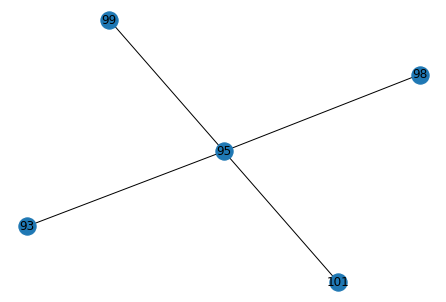

match_branches = [[93, 99]]
edges_to_delete (resolve crossover) = [[93, 95], [93, 98], [93, 101], [95, 98], [95, 99], [95, 101], [98, 99], [98, 101], [99, 101]]
edges_to_create (resolve crossover) = [[93, 99]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[93, 95], [93, 98], [93, 101], [95, 98], [95, 99], [95, 101], [98, 99], [98, 101], [99, 101]]
edges_to_create = [[93, 99]]
Number of connected components = 4
Comp 0 = {99, 93}
Comp 1 = {90, 91, 75, 76, 77, 78, 79, 63, 85, 87, 88, 89, 58, 59, 92, 61, 94, 95}
Comp 2 = {98}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 86, 96, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117}
curr_limb_copy.deleted_edges

  Edge: [0 2]: curr_angle = 45.31

Total time for doubling_back = 0.22986483573913574

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -103.02
Total time for width = 0.2089531421661377
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 103.02
Total time for width = 0.21329689025878906
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135609493511 = 188.7766239643097 ------


----- Working on Neuron 864691136008595118-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0 1 3 4]


 ----

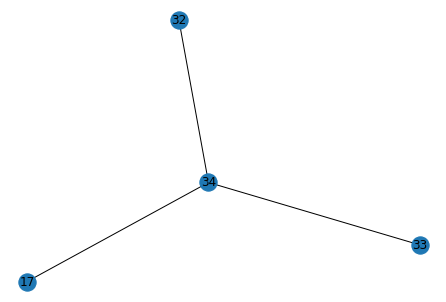

match_branches = []
edges_to_delete (resolve crossover) = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32}
Comp 1 = {0, 2, 4, 5, 7, 9, 17}
Comp 2 = {6, 14, 18, 19, 20, 21, 22, 28, 33, 35, 37, 53, 54, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
Comp 3 = {1, 3, 8, 10, 11, 12, 13, 15, 16, 23, 24, 25, 26, 27, 29, 30, 31, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 66, 67, 75, 76}
curr_limb_copy.deleted_edges = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 

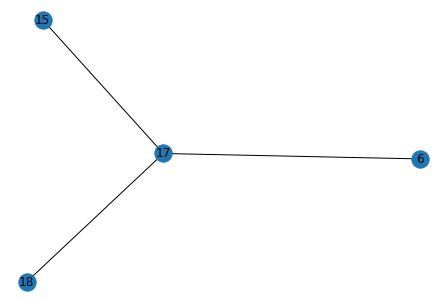

match_branches = [[15, 18]]
edges_to_delete (resolve crossover) = [[6, 15], [6, 17], [6, 18], [15, 17], [17, 18]]
edges_to_create (resolve crossover) = [[15, 18]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 17 because skeletal distance was 909.8671254569476 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 15], [6, 17], [6, 18], [15, 17], [17, 18]]
edges_to_create = [[15, 18]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18}
Comp 1 = {6}
Comp 2 = {17}
Comp 3 = {16}
curr_limb_copy.deleted_edges = [[6, 15], [6, 17], [6, 18], [15, 17], [17, 18]]
curr_limb_copy.created_edges = [[15, 18]]
After get best cut: cut_edges = [[6, 15], [6, 17], [6, 18], [15, 17], [17, 18]], added_edges = [[15, 18]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number

  Edge: [10 14]: curr_angle = 91.14

Total time for doubling_back = 0.04639577865600586

Attempting the width jump check (attempting from both sides)
  Edge: [10 14]: jump = 83.13
Total time for width = 0.013437747955322266
Path starting at 10 had err_edges: []
  Edge: [14 10]: jump = -99.47
Total time for width = 0.014046907424926758
Path starting at 14 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***


---- working on disconnecting 10 and 18
---- This disconnects S0_2 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortes

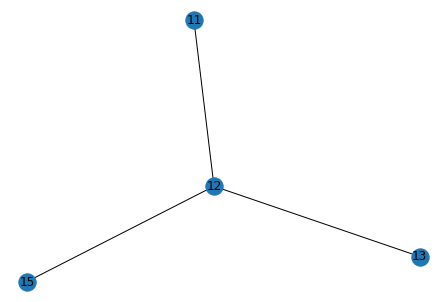

match_branches = [[11, 15], [12, 13]]
edges_to_delete (resolve crossover) = [[11, 12], [11, 13], [12, 15], [13, 15]]
edges_to_create (resolve crossover) = [[11, 15], [12, 13]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 18 because skeletal distance was 2223.9656353414566 and threshold was 2500
skip_nodes = [18]
edges_to_delete (cut_limb_network) = [[11, 12], [11, 13], [12, 15], [13, 15]]
edges_to_create = [[11, 15], [12, 13]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 18, 19, 20, 21}
Comp 1 = {10, 12, 13, 14}
Comp 2 = {17}
curr_limb_copy.deleted_edges = [[11, 12], [11, 13], [12, 15], [13, 15]]
curr_limb_copy.created_edges = [[11, 15], [12, 13]]
After get best cut: cut_edges = [[11, 12], [11, 13], [12, 15], [13, 15]], added_edges = [[11, 15], [12, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the

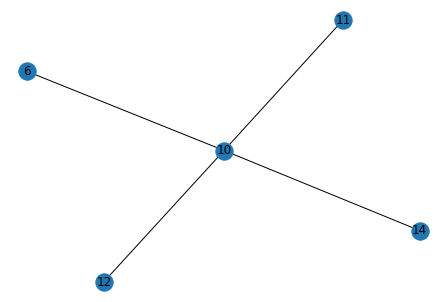

match_branches = [[6, 14]]
edges_to_delete (resolve crossover) = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
edges_to_create (resolve crossover) = [[6, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
edges_to_create = [[6, 14]]
Number of connected components = 5
Comp 0 = {1, 4, 5, 6, 7, 14, 20, 21}
Comp 1 = {0, 2, 3, 9, 10}
Comp 2 = {11}
Comp 3 = {8, 12, 15, 16, 17, 18, 19, 22, 23}
Comp 4 = {13}
curr_limb_copy.deleted_edges = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
curr_limb_copy.created_edges = [[6, 14]]
After get best cut: cut_edges = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]], added_edges = [[6, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the sp

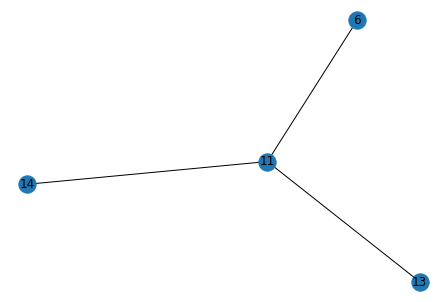

match_branches = [[11, 14], [6, 13]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create (resolve crossover) = [[11, 14], [6, 13]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create = [[11, 14], [6, 13]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27.0, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Comp 1 = {10, 11, 14, 7}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14]]
curr_limb_copy.created_edges = [[11, 14], [6, 13]]
After get best cut: cut_edges = [[6, 11], [6, 14], [11, 13], [13, 14]], added_edges = [[11, 14], [6, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end

  Edge: [41 37]: curr_angle = 40.51
  Edge: [37 28]: curr_angle = 28.21
  Edge: [28 26]: curr_angle = 18.36
  Edge: [26 35]: curr_angle = 143.22
  Edge: [35 36]: curr_angle = 30.5
  Edge: [36 42]: curr_angle = 26.24

Total time for doubling_back = 0.15779829025268555
There were 1 edges that passed doubling back threshold of 100
Winning edge [26 35] had a doubling back of 143.2197162134754
***inside resolve crossover!!!!****
coordinate_branches = [26, 31, 35]
26 = red
31 = aqua
35 = purple
Angle between 26 and 31 = 12.06 
Angle between 26 and 35 = 158.77 
Angle between 31 and 35 = 24.21 
Final Matches = [[26, 31], [31, 35]]
matched_branches_revised = [[26, 31]]
Original graph


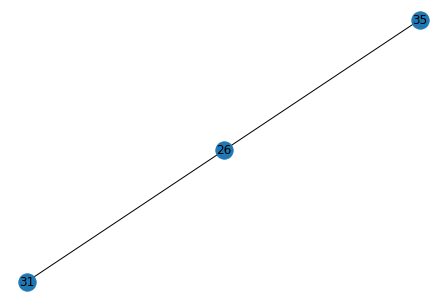

match_branches = [[26, 31]]
edges_to_delete (resolve crossover) = [[26, 35], [31, 35]]
edges_to_create (resolve crossover) = [[26, 31]]
edges_to_delete (cut_limb_network) = [array([26, 35]), array([31, 35])]
edges_to_create = [[26, 31]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 8, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27.0, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49}
Comp 1 = {35, 36, 6, 42, 43, 13}
Comp 2 = {10, 11, 14, 7}
Comp 3 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14], array([26, 35]), array([31, 35])]
curr_limb_copy.created_edges = [[11, 14], [6, 13], [26, 31]]
After get best cut: cut_edges = [array([26, 35]), array([31, 35])], added_edges = [[26, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so m

  Edge: [18 11]: curr_angle = 56.37
  Edge: [11  9]: curr_angle = 99.22
  Edge: [9 8]: curr_angle = 83.2
  Edge: [ 8 29]: curr_angle = 32.89
  Edge: [29 21]: curr_angle = 106.48

Total time for doubling_back = 0.8489320278167725
There were 1 edges that passed doubling back threshold of 100
Winning edge [29 21] had a doubling back of 106.48028313305805
***inside resolve crossover!!!!****
coordinate_branches = [21, 27, 29]
21 = red
27 = aqua
29 = purple
Angle between 21 and 27 = 39.07 
Angle between 21 and 29 = 115.7 
Angle between 27 and 29 = 71.31 
Final Matches = []
matched_branches_revised = []
Original graph


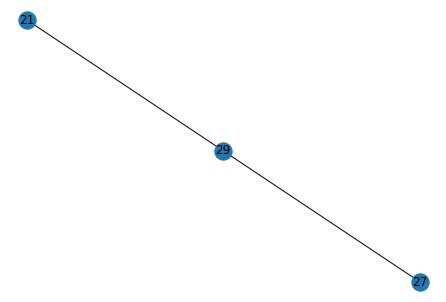

match_branches = []
edges_to_delete (resolve crossover) = [[21, 27], [21, 29], [27, 29]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([21, 27]), array([21, 29]), array([27, 29])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 29, 30}
Comp 1 = {21}
Comp 2 = {0, 7, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38}
curr_limb_copy.deleted_edges = [array([21, 27]), array([21, 29]), array([27, 29])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([21, 27]), array([21, 29]), array([27, 29])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 18 and 34
---- This disconnec

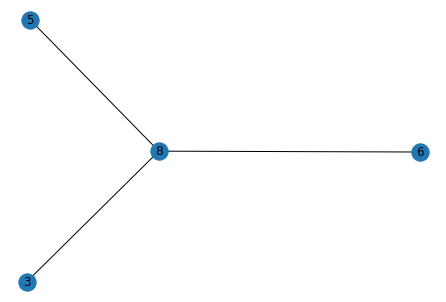

match_branches = [[6, 8]]
edges_to_delete (resolve crossover) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create (resolve crossover) = [[6, 8]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create = [[6, 8]]
Number of connected components = 4
Comp 0 = {1, 2, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
curr_limb_copy.created_edges = [[6, 8]]
After get best cut: cut_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]], added_edges = [[6, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No va

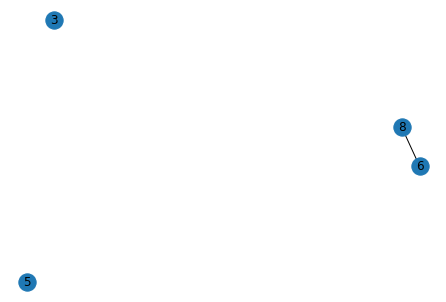

match_branches = [[6, 8]]
edges_to_delete (resolve crossover) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create (resolve crossover) = [[6, 8]]
curr_limb.deleted_edges 5 =[[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create = [[6, 8]]
Number of connected components = 4
Comp 0 = {1, 2, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
curr_limb_copy.created_edges = [[6, 8], [6, 8]]
After get best cut: cut_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]], added_edges = [[6, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRE

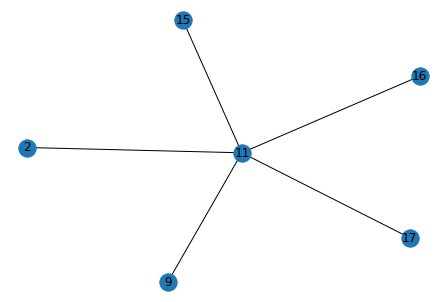

match_branches = [[11, 15], [9, 17]]
edges_to_delete (resolve crossover) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 16], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[11, 15], [9, 17]]
curr_limb.deleted_edges 5 =[[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 16], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create = [[11, 15], [9, 17]]
Number of connected components = 7
Comp 0 = {1, 6, 8, 10, 11, 14, 15}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {2}
Comp 4 = {9, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 5 = {16}
Comp 6 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [2, 9], [2, 11], [2

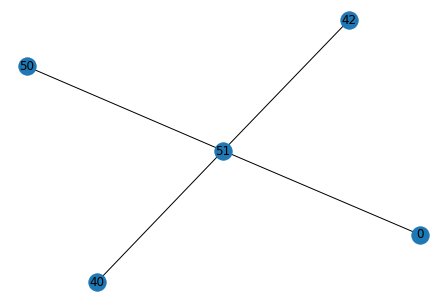

match_branches = [[42, 51], [0, 50]]
edges_to_delete (resolve crossover) = [[0, 40], [0, 42], [0, 51], [40, 42], [40, 50], [40, 51], [42, 50], [50, 51]]
edges_to_create (resolve crossover) = [[42, 51], [0, 50]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 40], [0, 42], [0, 51], [40, 42], [40, 50], [40, 51], [42, 50], [50, 51]]
edges_to_create = [[42, 51], [0, 50]]
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 51, 52, 55, 56, 57, 61, 62}
Comp 1 = {0, 10, 44, 48, 50, 53, 54, 58, 59, 60}
Comp 2 = {40}
curr_limb_copy.deleted_edges = [[0, 40], [0, 42], [0, 51], [40, 42], [40, 50], [40, 51], [42, 50], [50, 51]]
curr_limb_copy.created_edges = [[42, 51], [0, 50]]
After get best cut: cut_edges = [[0, 40], [0, 42], [0, 51], [40, 42], [40, 50], [40, 51], [42, 50], [50, 51]], added_edges 

  Edge: [57 56]: curr_angle = 30.8
  Edge: [56 47]: curr_angle = 49.53
  Edge: [47 45]: curr_angle = 24.21
  Edge: [45 46]: curr_angle = 115.5
  Edge: [46 55]: curr_angle = 18.07
  Edge: [55 61]: curr_angle = 14.57

Total time for doubling_back = 0.3474142551422119
There were 1 edges that passed doubling back threshold of 100
Winning edge [45 46] had a doubling back of 115.50124977304834
***inside resolve crossover!!!!****
coordinate_branches = [21, 45, 46]
21 = red
45 = aqua
46 = purple
Angle between 21 and 45 = 58.79 
Angle between 21 and 46 = 9.9 
Angle between 45 and 46 = 131.09 
Final Matches = [[21, 46]]
matched_branches_revised = [[21, 46]]
Original graph


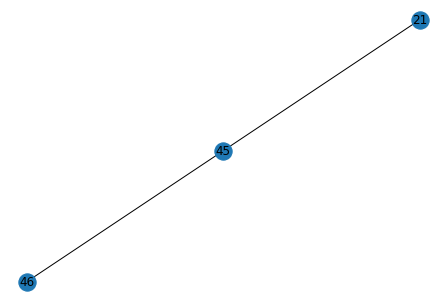

match_branches = [[21, 46]]
edges_to_delete (resolve crossover) = [[21, 45], [45, 46]]
edges_to_create (resolve crossover) = [[21, 46]]
edges_to_delete (cut_limb_network) = [array([21, 45]), array([45, 46])]
edges_to_create = [[21, 46]]
Number of connected components = 4
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 45, 47, 49, 51, 52, 56, 57}
Comp 1 = {0, 10, 44, 48, 50, 53, 54, 58, 59, 60}
Comp 2 = {40}
Comp 3 = {38, 46, 21, 55, 61, 62}
curr_limb_copy.deleted_edges = [[0, 40], [0, 42], [0, 51], [40, 42], [40, 50], [40, 51], [42, 50], [50, 51], array([21, 45]), array([45, 46])]
curr_limb_copy.created_edges = [[42, 51], [0, 50], [21, 46]]
After get best cut: cut_edges = [array([21, 45]), array([45, 46])], added_edges = [[21, 46]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 

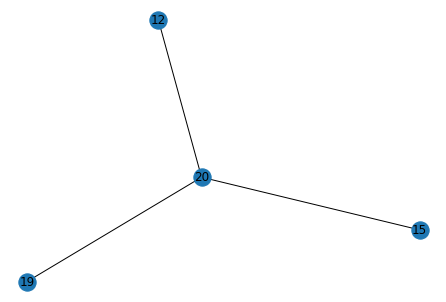

match_branches = [[12, 20], [15, 19]]
edges_to_delete (resolve crossover) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create (resolve crossover) = [[12, 20], [15, 19]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 28 because skeletal distance was 696.8381837196468 and threshold was 2500
skip_nodes = [28]
edges_to_delete (cut_limb_network) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create = [[12, 20], [15, 19]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20]]
curr_limb_copy.created_edges = [[12, 20], [15, 19]]
After get best cut: cut_edges = [[12, 15], [12, 19], [15, 20], [19,

  Edge: [25 11]: curr_angle = 47.44
  Edge: [11  2]: curr_angle = 15.45
  Edge: [2 3]: curr_angle = 111.13
  Edge: [ 3 17]: curr_angle = 32.6
  Edge: [17 30]: curr_angle = 59.77
  Edge: [30 29]: curr_angle = 36.56

Total time for doubling_back = 0.5605130195617676
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 3] had a doubling back of 111.13445723256888
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 16.37 
Angle between 1 and 3 = 78.18 
Angle between 2 and 3 = 97.1 
Final Matches = [[1, 2]]
matched_branches_revised = [[1, 2]]
Original graph


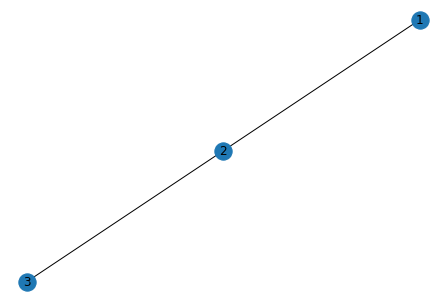

match_branches = [[1, 2]]
edges_to_delete (resolve crossover) = [[1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[1, 2]]
edges_to_delete (cut_limb_network) = [array([1, 3]), array([2, 3])]
edges_to_create = [[1, 2]]
Number of connected components = 3
Comp 0 = {3, 6, 15, 17, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {1, 2, 7, 8, 9, 10, 11, 13, 14, 16, 18, 21, 22, 25, 26, 28}
Comp 2 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20], array([1, 3]), array([2, 3])]
curr_limb_copy.created_edges = [[12, 20], [15, 19], [1, 2]]
After get best cut: cut_edges = [array([1, 3]), array([2, 3])], added_edges = [[1, 2]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

  Edge: [3 2]: curr_angle = 13.39
  Edge: [2 1]: curr_angle = 157.79
  Edge: [1 5]: curr_angle = 55.72

Total time for doubling_back = 0.18178701400756836
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 1] had a doubling back of 157.79433083342465
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 11.33 
Angle between 0 and 2 = 55.93 
Angle between 1 and 2 = 129.97 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


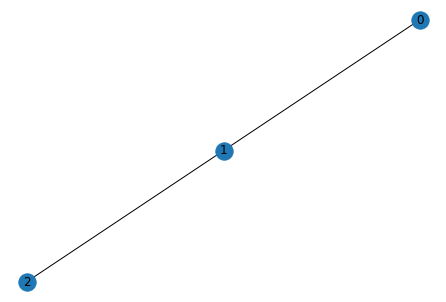

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {2, 3, 4}
Comp 1 = {0, 1, 5, 6}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([2, 3, 4]), array([0, 1, 5, 6])]


 ------ Total time for Splitting 864691135274155493 = 215.24045634269714 ------


----- Working on Neuron 864691135210051520-------
Decompressing Neu

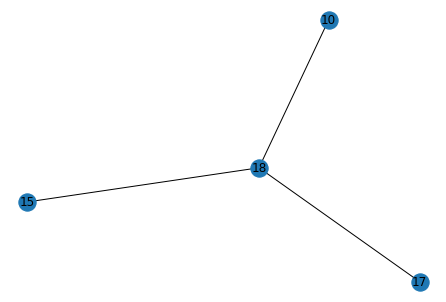

match_branches = []
edges_to_delete (resolve crossover) = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {10}
Comp 2 = {0, 6, 15}
Comp 3 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the en

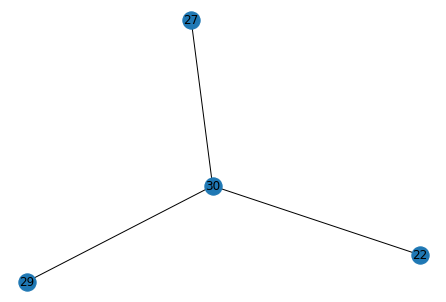

match_branches = [[27, 30]]
edges_to_delete (resolve crossover) = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
edges_to_create (resolve crossover) = [[27, 30]]
curr_limb.deleted_edges 5 =[[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
edges_to_create = [[27, 30]]
Number of connected components = 6
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 16, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {18, 12, 22}
Comp 2 = {20, 29, 23}
Comp 3 = {10}
Comp 4 = {0, 6, 15}
Comp 5 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18], [22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
curr_limb_copy.created_edges = [[27, 30]]
After get best cut: cut_edges = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]], 

  Edge: [26 24]: curr_angle = 43.76
  Edge: [24 25]: curr_angle = 64.03
  Edge: [25 31]: curr_angle = 23.72
  Edge: [31 33]: curr_angle = 160.11
  Edge: [33 30]: curr_angle = 42.34
  Edge: [30 27]: curr_angle = 25.63

Total time for doubling_back = 0.24021220207214355
There were 1 edges that passed doubling back threshold of 100
Winning edge [31 33] had a doubling back of 160.1097667646769
***inside resolve crossover!!!!****
coordinate_branches = [3, 31, 33]
3 = red
31 = aqua
33 = purple
Angle between 3 and 31 = 22.31 
Angle between 3 and 33 = 28.78 
Angle between 31 and 33 = 134.52 
Final Matches = [[3, 31], [3, 33]]
matched_branches_revised = [[3, 31]]
Original graph


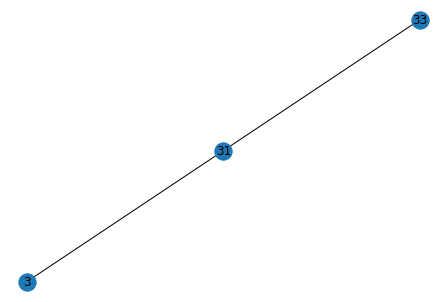

match_branches = [[3, 31]]
edges_to_delete (resolve crossover) = [[3, 33], [31, 33]]
edges_to_create (resolve crossover) = [[3, 31]]
edges_to_delete (cut_limb_network) = [array([ 3, 33]), array([31, 33])]
edges_to_create = [[3, 31]]
Number of connected components = 7
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 16, 19, 21, 24, 25, 26, 28, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {33, 34, 27, 30}
Comp 2 = {18, 12, 22}
Comp 3 = {20, 29, 23}
Comp 4 = {10}
Comp 5 = {0, 6, 15}
Comp 6 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18], [22, 27], [22, 29], [22, 30], [27, 29], [29, 30], array([ 3, 33]), array([31, 33])]
curr_limb_copy.created_edges = [[27, 30], [3, 31]]
After get best cut: cut_edges = [array([ 3, 33]), array([31, 33])], added_edges = [[3, 31]]
total_soma_paths_to_cut = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
-----------count

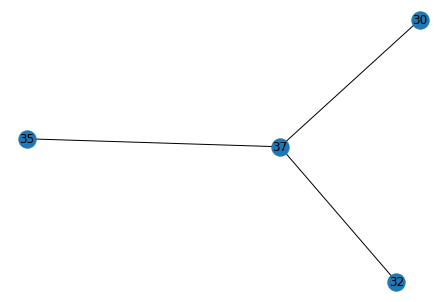

match_branches = []
edges_to_delete (resolve crossover) = [[30, 32], [30, 35], [30, 37], [32, 35], [32, 37], [35, 37]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[30, 32], [30, 35], [30, 37], [32, 35], [32, 37], [35, 37]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 37, 39, 40, 41, 42, 43, 44, 45}
Comp 1 = {30}
Comp 2 = {32, 3, 31}
Comp 3 = {0, 1, 34, 35, 36, 33, 38, 2, 15}
curr_limb_copy.deleted_edges = [[30, 32], [30, 35], [30, 37], [32, 35], [32, 37], [35, 37]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[30, 32], [30, 35], [30, 37], [32, 35], [32, 37], [35, 37]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of t

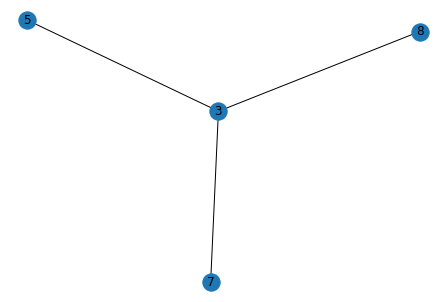

match_branches = [[3, 7]]
edges_to_delete (resolve crossover) = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]]
edges_to_create (resolve crossover) = [[3, 7]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 1 because skeletal distance was 1339.6153674452503 and threshold was 2500
skip_nodes = [1]
edges_to_delete (cut_limb_network) = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]]
edges_to_create = [[3, 7]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25}
Comp 1 = {5}
Comp 2 = {8}
Comp 3 = {19}
curr_limb_copy.deleted_edges = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]]
curr_limb_copy.created_edges = [[3, 7]]
After get best cut: cut_edges = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]], added_edges = [[3, 7]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
Shortes

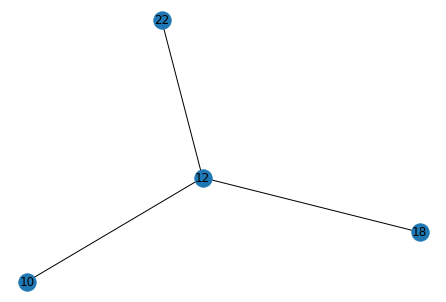

match_branches = [[10, 22]]
edges_to_delete (resolve crossover) = [[10, 12], [10, 18], [12, 18], [12, 22], [18, 22]]
edges_to_create (resolve crossover) = [[10, 22]]
curr_limb.deleted_edges 5 =[[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]]
Skipping endnode 1 because skeletal distance was 1339.6153674452503 and threshold was 2500
skip_nodes = [1]
edges_to_delete (cut_limb_network) = [[10, 12], [10, 18], [12, 18], [12, 22], [18, 22]]
edges_to_create = [[10, 22]]
Number of connected components = 6
Comp 0 = {1, 3, 4, 7, 9, 12, 13, 14, 16, 17, 20, 21}
Comp 1 = {5}
Comp 2 = {8}
Comp 3 = {0, 2, 6, 10, 11, 22, 24, 25}
Comp 4 = {18, 15, 23}
Comp 5 = {19}
curr_limb_copy.deleted_edges = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8], [10, 12], [10, 18], [12, 18], [12, 22], [18, 22]]
curr_limb_copy.created_edges = [[3, 7], [10, 22]]
After get best cut: cut_edges = [[10, 12], [10, 18], [12, 18], [12, 22], [18, 22]], added_edges = [[10, 22]]
total_soma_paths_to_cut = [[3, 5], [3, 8], [5, 7], [5, 8], [7, 8]]
----

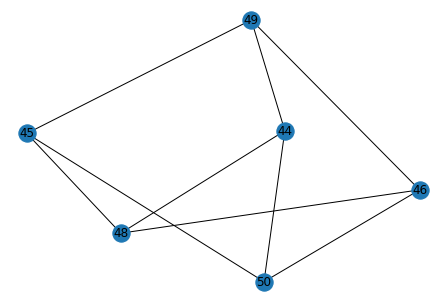

match_branches = [[46, 50]]
edges_to_delete (resolve crossover) = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
edges_to_create (resolve crossover) = [[46, 50]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
edges_to_create = [[46, 50]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 46, 47, 48, 49.0, 50.0, 51, 54, 55, 56, 57.0, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81}
Comp 1 = {38, 41, 42, 44, 45}
Comp 2 = {52}
Comp 3 = {53}
Comp 4 = {76}
curr_limb_copy.deleted_edges = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], 

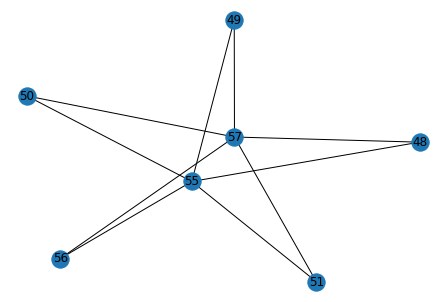

match_branches = [[50, 55], [49, 57], [48, 56]]
edges_to_delete (resolve crossover) = [[48, 49], [48, 50], [48, 51], [48, 55], [48, 57], [49, 50], [49, 51], [49, 55], [49, 56], [50, 51], [50, 56], [50, 57], [51, 55], [51, 56], [51, 57], [55, 56], [55, 57], [56, 57]]
edges_to_create (resolve crossover) = [[50, 55], [49, 57], [48, 56]]
curr_limb.deleted_edges 5 =[[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[48, 49], [48, 50], [48, 51], [48, 55], [48, 57], [49, 50], [49, 51], [49, 55], [49, 56], [50, 51], [50, 56], [50, 57], [51, 55], [51, 56], [51, 57], [55, 56], [55, 57], [56, 57]]
edges_to_create = [[50, 55], [49, 57], [48, 56]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 10, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 43, 46, 47, 49.0, 50.0, 55, 57.0, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6

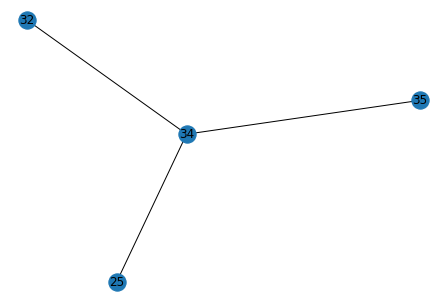

match_branches = []
edges_to_delete (resolve crossover) = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {10, 23, 35, 36, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62.0, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Comp 1 = {1, 2, 4, 7, 11, 21, 25}
Comp 2 = {0, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 3 = {34}
Comp 4 = {33}
Comp 5 = {59}
Comp 6 = {65}
Comp 7 = {90}
curr_limb_copy.deleted_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 

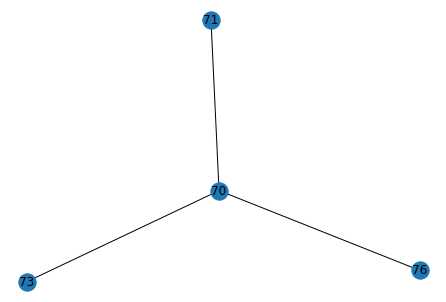

match_branches = [[71, 73]]
edges_to_delete (resolve crossover) = [[70, 71], [70, 73], [70, 76], [71, 76], [73, 76]]
edges_to_create (resolve crossover) = [[71, 73]]
curr_limb.deleted_edges 5 =[[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[70, 71], [70, 73], [70, 76], [71, 76], [73, 76]]
edges_to_create = [[71, 73]]
Number of connected components = 10
Comp 0 = {10, 23, 35, 36, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62.0, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Comp 1 = {70}
Comp 2 = {76}
Comp 3 = {1, 2, 4, 7, 11, 21, 25}
Comp 4 = {0, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 5 = {34}
Comp 6 = {33}
Comp 7 = {59}
Comp 8 = {65}
Comp 9 = {90}
curr_limb_copy.deleted_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35], [70, 71], [70, 73], [70, 76],

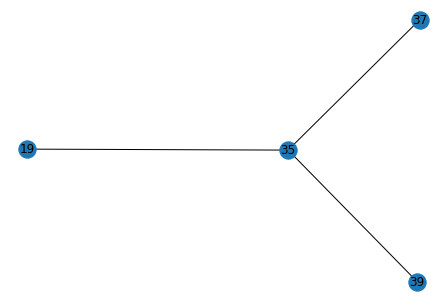

match_branches = []
edges_to_delete (resolve crossover) = [[19, 35], [19, 37], [19, 39], [35, 37], [35, 39], [37, 39]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 35], [19, 37], [19, 39], [35, 37], [35, 39], [37, 39]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25.0, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 41, 42, 43, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93}
Comp 1 = {19}
Comp 2 = {3, 5, 37, 40, 44, 45, 20, 52, 58, 60}
Comp 3 = {39}
curr_limb_copy.deleted_edges = [[19, 35], [19, 37], [19, 39], [35, 37], [35, 39], [37, 39]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[19, 35], [19, 37], [19, 39], [35, 37], [35, 39], [37, 39]], added_edges 

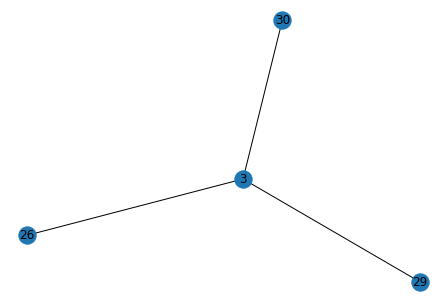

match_branches = [[3, 29], [26, 30]]
edges_to_delete (resolve crossover) = [[3, 26], [3, 30], [26, 29], [29, 30]]
edges_to_create (resolve crossover) = [[3, 29], [26, 30]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 6 because skeletal distance was 117.21848617892846 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 26], [3, 30], [26, 29], [29, 30]]
edges_to_create = [[3, 29], [26, 30]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37}
Comp 1 = {3, 29}
Comp 2 = {28}
Comp 3 = {38}
curr_limb_copy.deleted_edges = [[3, 26], [3, 30], [26, 29], [29, 30]]
curr_limb_copy.created_edges = [[3, 29], [26, 30]]
After get best cut: cut_edges = [[3, 26], [3, 30], [26, 29], [29, 30]], added_edges = [[3, 29], [26, 30]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the spli

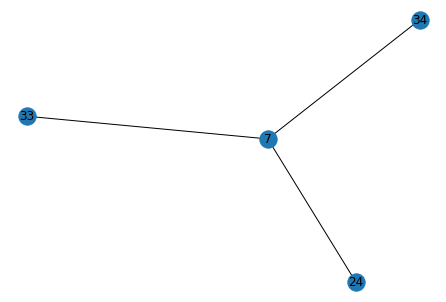

match_branches = [[24, 34], [7, 33]]
edges_to_delete (resolve crossover) = [[7, 24], [7, 34], [24, 33], [33, 34]]
edges_to_create (resolve crossover) = [[24, 34], [7, 33]]
curr_limb.deleted_edges 5 =[[3, 26], [3, 30], [26, 29], [29, 30]]
Skipping endnode 6 because skeletal distance was 117.21848617892846 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[7, 24], [7, 34], [24, 33], [33, 34]]
edges_to_create = [[24, 34], [7, 33]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 31, 32, 33}
Comp 1 = {34, 35, 36, 37, 10, 21, 22, 23, 24, 25, 26, 27, 30}
Comp 2 = {3, 29}
Comp 3 = {28}
Comp 4 = {38}
curr_limb_copy.deleted_edges = [[3, 26], [3, 30], [26, 29], [29, 30], [7, 24], [7, 34], [24, 33], [33, 34]]
curr_limb_copy.created_edges = [[3, 29], [26, 30], [24, 34], [7, 33]]
After get best cut: cut_edges = [[7, 24], [7, 34], [24, 33], [33, 34]], added_edges = [[24, 34], [7, 33]]
total_soma_paths_to_cut

  Edge: [15 16]: curr_angle = 61.76
  Edge: [16 18]: curr_angle = 139.24
  Edge: [18 22]: curr_angle = 138.94
  Edge: [22 21]: curr_angle = 165.82
  Edge: [21 23]: curr_angle = 33.32
  Edge: [23 24]: curr_angle = 176.79

Total time for doubling_back = 0.15613269805908203
There were 4 edges that passed doubling back threshold of 100
Winning edge [23 24] had a doubling back of 176.78574386128113
***inside resolve crossover!!!!****
coordinate_branches = [17, 23, 24]
17 = red
23 = aqua
24 = purple
Angle between 17 and 23 = 82.62 
Angle between 17 and 24 = 58.83 
Angle between 23 and 24 = 45.8 
Final Matches = []
matched_branches_revised = []
Original graph


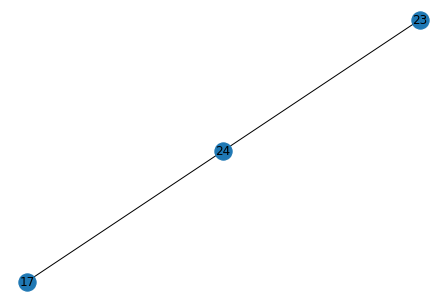

match_branches = []
edges_to_delete (resolve crossover) = [[17, 23], [17, 24], [23, 24]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([17, 23]), array([17, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28}
Comp 1 = {17, 12, 6}
Comp 2 = {24}
curr_limb_copy.deleted_edges = [array([17, 23]), array([17, 24]), array([23, 24])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([17, 23]), array([17, 24]), array([23, 24])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 1

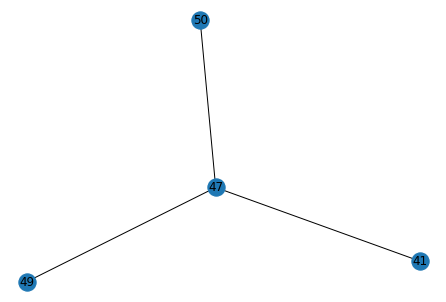

match_branches = [[41, 50]]
edges_to_delete (resolve crossover) = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50]]
edges_to_create (resolve crossover) = [[41, 50]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50]]
edges_to_create = [[41, 50]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {41, 50}
Comp 2 = {49}
Comp 3 = {48}
curr_limb_copy.deleted_edges = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50]]
curr_limb_copy.created_edges = [[41, 50]]
After get best cut: cut_edges = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50]], added_edges = [[41, 50]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split B

  Edge: [30 29]: curr_angle = 31.36
  Edge: [29 31]: curr_angle = 19.52
  Edge: [31 21]: curr_angle = 27.48
  Edge: [21 22]: curr_angle = 125.52
  Edge: [22 28]: curr_angle = 100.16
  Edge: [28 35]: curr_angle = 20.81
  Edge: [35 39]: curr_angle = 17.71
  Edge: [39 42]: curr_angle = 26.56
  Edge: [42 43]: curr_angle = 18.27

Total time for doubling_back = 0.5330109596252441
There were 2 edges that passed doubling back threshold of 100
Winning edge [21 22] had a doubling back of 125.515713405206
***inside resolve crossover!!!!****
coordinate_branches = [20, 21, 22]
20 = red
21 = aqua
22 = purple
Angle between 20 and 21 = 33.78 
Angle between 20 and 22 = 44.43 
Angle between 21 and 22 = 125.66 
Final Matches = [[20, 21]]
matched_branches_revised = [[20, 21]]
Original graph


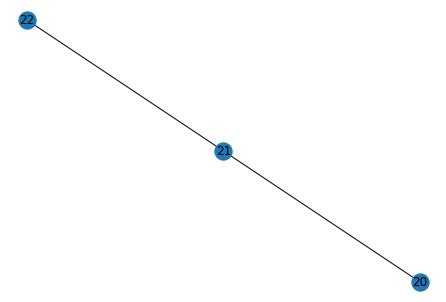

match_branches = [[20, 21]]
edges_to_delete (resolve crossover) = [[20, 22], [21, 22]]
edges_to_create (resolve crossover) = [[20, 21]]
edges_to_delete (cut_limb_network) = [array([20, 22]), array([21, 22])]
edges_to_create = [[20, 21]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {41, 50}
Comp 2 = {49}
Comp 3 = {48}
curr_limb_copy.deleted_edges = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50], array([20, 22]), array([21, 22])]
curr_limb_copy.created_edges = [[41, 50], [20, 21]]
After get best cut: cut_edges = [array([20, 22]), array([21, 22])], added_edges = [[20, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the s

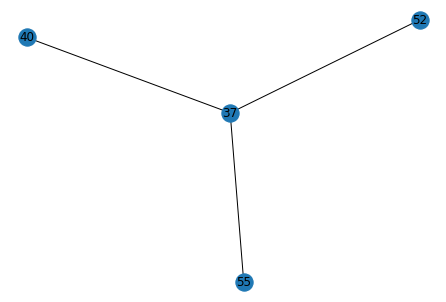

match_branches = [[37, 55]]
edges_to_delete (resolve crossover) = [[37, 40], [37, 52], [40, 52], [40, 55], [52, 55]]
edges_to_create (resolve crossover) = [[37, 55]]
curr_limb.deleted_edges 5 =[[41, 47], [41, 49], [47, 49], [47, 50], [49, 50], array([20, 22]), array([21, 22])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[37, 40], [37, 52], [40, 52], [40, 55], [52, 55]]
edges_to_create = [[37, 55]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 55}
Comp 1 = {12, 13, 22, 24, 28, 35, 39, 40, 42, 43, 44, 45, 46, 47, 51, 53, 56, 57, 58, 59, 60}
Comp 2 = {52}
Comp 3 = {41, 50}
Comp 4 = {49}
Comp 5 = {48}
Comp 6 = {54}
curr_limb_copy.deleted_edges = [[41, 47], [41, 49], [47, 49], [47, 50], [49, 50], array([20, 22]), array([21, 22]), [37, 40], [37, 52], [40, 52], [40, 55], [52, 55]]
curr_limb_copy.created_edges = [[41, 50], [20, 21], [37, 55]]
After get best cut: cu

  Edge: [19 13]: curr_angle = 20.6
  Edge: [13  9]: curr_angle = 22.34
  Edge: [9 4]: curr_angle = 46.24
  Edge: [4 5]: curr_angle = 130.89
  Edge: [5 6]: curr_angle = 137.45
  Edge: [ 6 15]: curr_angle = 18.64
  Edge: [15 16]: curr_angle = 51.87
  Edge: [16 23]: curr_angle = 43.93

Total time for doubling_back = 0.5510823726654053
There were 2 edges that passed doubling back threshold of 100
Winning edge [5 6] had a doubling back of 137.45125106603678
***inside resolve crossover!!!!****
coordinate_branches = [1, 5, 6]
1 = red
5 = aqua
6 = purple
Angle between 1 and 5 = 143.07 
Angle between 1 and 6 = 22.55 
Angle between 5 and 6 = 57.62 
Final Matches = [[1, 6]]
matched_branches_revised = [[1, 6]]
Original graph


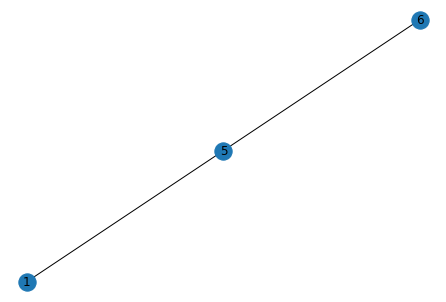

match_branches = [[1, 6]]
edges_to_delete (resolve crossover) = [[1, 5], [5, 6]]
edges_to_create (resolve crossover) = [[1, 6]]
edges_to_delete (cut_limb_network) = [array([1, 5]), array([5, 6])]
edges_to_create = [[1, 6]]
Number of connected components = 2
Comp 0 = {1, 3, 6, 8, 10, 15, 16, 18, 20, 21, 22, 23}
Comp 1 = {0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 17, 19, 24}
curr_limb_copy.deleted_edges = [array([1, 5]), array([5, 6])]
curr_limb_copy.created_edges = [[1, 6]]
After get best cut: cut_edges = [array([1, 5]), array([5, 6])], added_edges = [[1, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 19 and 24
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total 

  Edge: [19 13]: curr_angle = 20.6
  Edge: [13 12]: curr_angle = 158.69
  Edge: [12 24]: curr_angle = 46.07

Total time for doubling_back = 0.49268484115600586
There were 1 edges that passed doubling back threshold of 100
Winning edge [13 12] had a doubling back of 158.68518612418313
***inside resolve crossover!!!!****
coordinate_branches = [9, 12, 13]
9 = red
12 = aqua
13 = purple
Angle between 9 and 12 = 80.77 
Angle between 9 and 13 = 11.22 
Angle between 12 and 13 = 104.1 
Final Matches = [[9, 13]]
matched_branches_revised = [[9, 13]]
Original graph


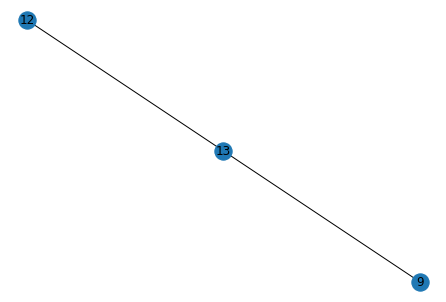

match_branches = [[9, 13]]
edges_to_delete (resolve crossover) = [[9, 12], [12, 13]]
edges_to_create (resolve crossover) = [[9, 13]]
edges_to_delete (cut_limb_network) = [array([ 9, 12]), array([12, 13])]
edges_to_create = [[9, 13]]
Number of connected components = 3
Comp 0 = {1, 3, 6, 8, 10, 15, 16, 18, 20, 21, 22, 23}
Comp 1 = {0, 2, 4, 5, 7, 9, 13, 19}
Comp 2 = {11, 12, 14, 17, 24}
curr_limb_copy.deleted_edges = [array([1, 5]), array([5, 6]), array([ 9, 12]), array([12, 13])]
curr_limb_copy.created_edges = [[1, 6], [9, 13]]
After get best cut: cut_edges = [array([ 9, 12]), array([12, 13])], added_edges = [[9, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 23 and 24
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
Total nu

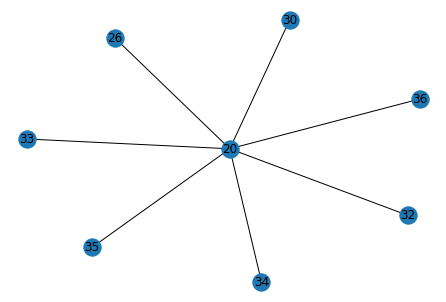

match_branches = []
edges_to_delete (resolve crossover) = [[20, 26], [20, 30], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [26, 30], [26, 32], [26, 33], [26, 34], [26, 35], [26, 36], [30, 32], [30, 33], [30, 34], [30, 35], [30, 36], [32, 33], [32, 34], [32, 35], [32, 36], [33, 34], [33, 35], [33, 36], [34, 35], [34, 36], [35, 36]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 26], [20, 30], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [26, 30], [26, 32], [26, 33], [26, 34], [26, 35], [26, 36], [30, 32], [30, 33], [30, 34], [30, 35], [30, 36], [32, 33], [32, 34], [32, 35], [32, 36], [33, 34], [33, 35], [33, 36], [34, 35], [34, 36], [35, 36]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29}
Comp 1 = {26}
Comp 2 = {30}
Comp 3 = {32, 34, 37, 38, 39, 40, 73, 41, 76, 77, 78, 25, 31}
C

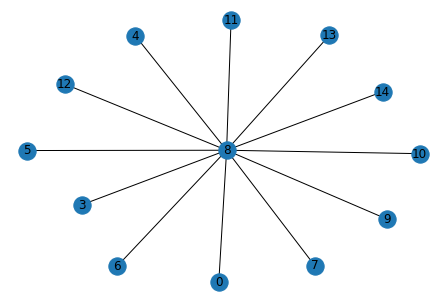

match_branches = [[7, 9]]
edges_to_delete (resolve crossover) = [[0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [7, 8], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [10, 11], [10, 12], [10, 13], [10, 14], [11, 12], [11, 13], [11, 14], [12, 13], [12, 14], [13, 14]]
edges_to_create (resolve crossover) = [[7, 9]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 8 because skeletal distance was 431.1913272675745 and threshold was 2500
Skipping endnode 36 because skeletal distance was 2370.8385745122664 and threshold was 2500


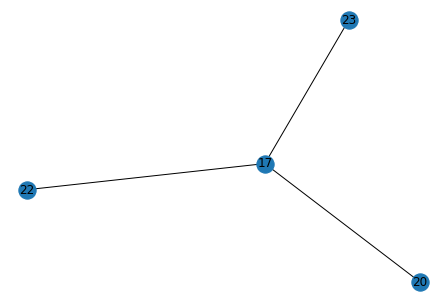

match_branches = [[17, 23], [20, 22]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[17, 23], [20, 22]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 7 because skeletal distance was 2388.1059912785863 and threshold was 2500
skip_nodes = [7]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 22], [20, 23], [22, 23]]
edges_to_create = [[17, 23], [20, 22]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 23}
Comp 1 = {11, 20, 21, 22}
curr_limb_copy.deleted_edges = [[17, 20], [17, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[17, 23], [20, 22]]
After get best cut: cut_edges = [[17, 20], [17, 22], [20, 23], [22, 23]], added_edges = [[17, 23], [20, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the spl

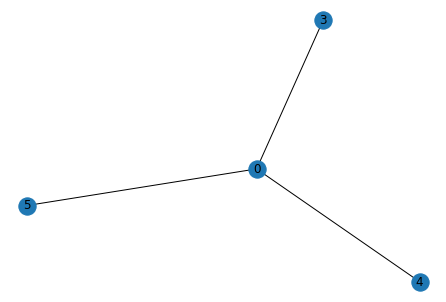

match_branches = [[0, 5], [3, 4]]
edges_to_delete (resolve crossover) = [[0, 3], [0, 4], [3, 5], [4, 5]]
edges_to_create (resolve crossover) = [[0, 5], [3, 4]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 3], [0, 4], [3, 5], [4, 5]]
edges_to_create = [[0, 5], [3, 4]]
Number of connected components = 2
Comp 0 = {0, 5, 8, 9, 10, 11, 12, 13}
Comp 1 = {1, 2, 3, 4, 6, 7}
curr_limb_copy.deleted_edges = [[0, 3], [0, 4], [3, 5], [4, 5]]
curr_limb_copy.created_edges = [[0, 5], [3, 4]]
After get best cut: cut_edges = [[0, 3], [0, 4], [3, 5], [4, 5]], added_edges = [[0, 5], [3, 4]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  5,  8,  9, 10, 11, 12, 13]), array([1, 2, 3, 

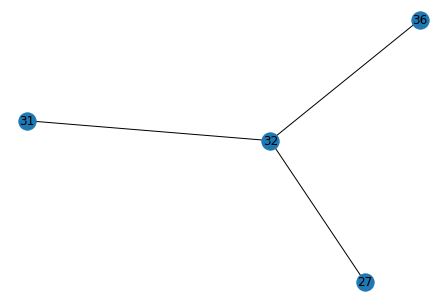

match_branches = [[27, 31]]
edges_to_delete (resolve crossover) = [[27, 32], [27, 36], [31, 32], [31, 36], [32, 36]]
edges_to_create (resolve crossover) = [[27, 31]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[27, 32], [27, 36], [31, 32], [31, 36], [32, 36]]
edges_to_create = [[27, 31]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 21, 22, 25, 26, 27, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {32, 33, 6, 10, 42, 16, 17, 18, 19, 20, 52, 23, 24}
Comp 2 = {36}
curr_limb_copy.deleted_edges = [[27, 32], [27, 36], [31, 32], [31, 36], [32, 36]]
curr_limb_copy.created_edges = [[27, 31

  Edge: [21 22]: curr_angle = 15.49
  Edge: [22 26]: curr_angle = 16.38
  Edge: [26 35]: curr_angle = 10.73
  Edge: [35 39]: curr_angle = 29.23
  Edge: [39 47]: curr_angle = 26.53
  Edge: [47 43]: curr_angle = 142.13
  Edge: [43 34]: curr_angle = 62.11

Total time for doubling_back = 0.32175445556640625
There were 1 edges that passed doubling back threshold of 100
Winning edge [47 43] had a doubling back of 142.13463126082576
***inside resolve crossover!!!!****
coordinate_branches = [43, 46, 47]
43 = red
46 = aqua
47 = purple
Angle between 43 and 46 = 24.26 
Angle between 43 and 47 = 154.77 
Angle between 46 and 47 = 20.82 
Final Matches = [[43, 46], [46, 47]]
matched_branches_revised = [[46, 47]]
Original graph


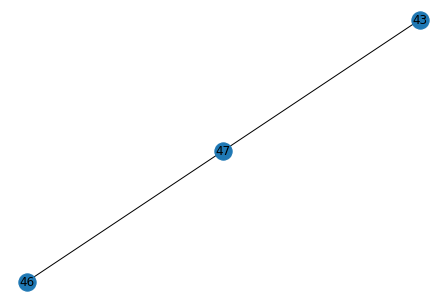

match_branches = [[46, 47]]
edges_to_delete (resolve crossover) = [[43, 46], [43, 47]]
edges_to_create (resolve crossover) = [[46, 47]]
edges_to_delete (cut_limb_network) = [array([43, 46]), array([43, 47])]
edges_to_create = [[46, 47]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 21, 22, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 50, 53, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {32, 33, 6, 10, 42, 16, 17, 18, 19, 20, 52, 23, 24}
Comp 2 = {36}
Comp 3 = {34, 74, 43, 75, 45, 12, 78, 79, 49, 51, 54, 55, 60}
curr_limb_copy.deleted_edges = [[27, 32], [27, 36], [31, 32], [31, 36], [32, 36], array([43, 46]), array([43, 47])]
curr_limb_copy.created_edges = [[27, 31], [46, 47]]
After get best cut: cut_edges = [ar

  Edge: [7 6]: curr_angle = 13.61
  Edge: [6 5]: curr_angle = 158.55
  Edge: [5 9]: curr_angle = 107.61
  Edge: [9 8]: curr_angle = 48.63
  Edge: [ 8 12]: curr_angle = 54.66
  Edge: [12 14]: curr_angle = 36.95
  Edge: [14 13]: curr_angle = 43.43

Total time for doubling_back = 0.21947741508483887
There were 2 edges that passed doubling back threshold of 100
Winning edge [6 5] had a doubling back of 158.55095489973962
***inside resolve crossover!!!!****
coordinate_branches = [2, 5, 6]
2 = red
5 = aqua
6 = purple
Angle between 2 and 5 = 133.86 
Angle between 2 and 6 = 37.01 
Angle between 5 and 6 = 12.96 
Final Matches = [[5, 6]]
matched_branches_revised = [[5, 6]]
Original graph


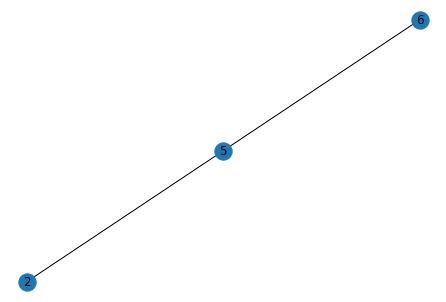

match_branches = [[5, 6]]
edges_to_delete (resolve crossover) = [[2, 5], [2, 6]]
edges_to_create (resolve crossover) = [[5, 6]]
Rejecting creating edge [5, 6] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([2, 5]), array([2, 6]), array([5, 6])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
Comp 1 = {2}
Comp 2 = {0, 1, 4, 6, 7}
curr_limb_copy.deleted_edges = [array([2, 5]), array([2, 6]), array([5, 6])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([2, 5]), array([2, 6]), array([5, 6])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array

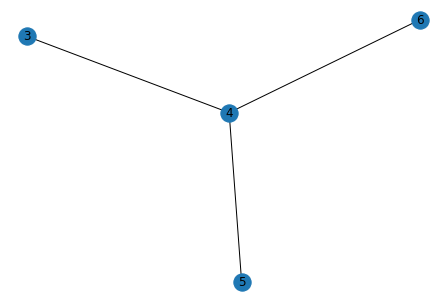

match_branches = [[4, 6]]
edges_to_delete (resolve crossover) = [[3, 4], [3, 5], [3, 6], [4, 5], [5, 6]]
edges_to_create (resolve crossover) = [[4, 6]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 8 because skeletal distance was 24.712297602525855 and threshold was 2500
skip_nodes = [8]
edges_to_delete (cut_limb_network) = [[3, 4], [3, 5], [3, 6], [4, 5], [5, 6]]
edges_to_create = [[4, 6]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27}
Comp 1 = {3, 20, 22}
Comp 2 = {4, 6}
curr_limb_copy.deleted_edges = [[3, 4], [3, 5], [3, 6], [4, 5], [5, 6]]
curr_limb_copy.created_edges = [[4, 6]]
After get best cut: cut_edges = [[3, 4], [3, 5], [3, 6], [4, 5], [5, 6]], added_edges = [[4, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid 

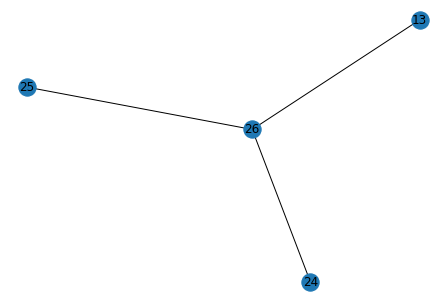

match_branches = [[13, 26], [24, 25]]
edges_to_delete (resolve crossover) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = [[13, 26], [24, 25]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 32 because skeletal distance was 593.6201352104455 and threshold was 2500
skip_nodes = [32]
edges_to_delete (cut_limb_network) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create = [[13, 26], [24, 25]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}
Comp 1 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26]]
curr_limb_copy.created_edges = [[13, 26], [24, 25]]
After get best cut: cut_edges = [[13, 24], [13, 25], [24, 26], [25, 26]], added_edges = [[13, 26], [24, 25]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at

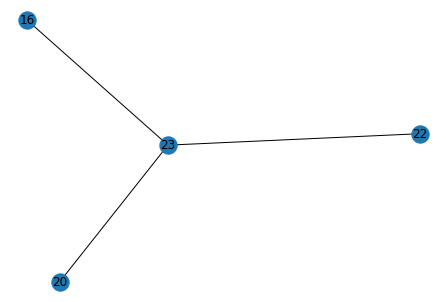

match_branches = [[20, 22], [16, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[20, 22], [16, 23]]
curr_limb.deleted_edges 5 =[[13, 24], [13, 25], [24, 26], [25, 26]]
Skipping endnode 32 because skeletal distance was 593.6201352104455 and threshold was 2500
skip_nodes = [32]
edges_to_delete (cut_limb_network) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create = [[20, 22], [16, 23]]
Number of connected components = 3
Comp 0 = {5, 7, 12, 14, 15, 16, 17, 18, 19, 23, 24, 25, 29, 30, 31, 32, 34, 35, 36, 37, 40, 41, 42, 44, 45}
Comp 1 = {0, 33, 2, 3, 4, 1, 38, 39, 6, 11, 43, 20, 21, 22, 28}
Comp 2 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26], [16, 20], [16, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[13, 26], [24, 25], [20, 22], [16, 23]]
After get best cut: cut_edges = [[16, 20], [16, 22], [20, 23], [22, 23]], added_edges = [[20, 22], [16, 23]

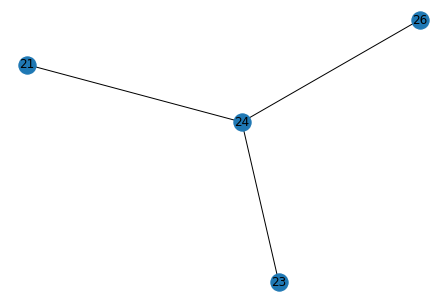

match_branches = [[21, 24]]
edges_to_delete (resolve crossover) = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create (resolve crossover) = [[21, 24]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create = [[21, 24]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 18, 19, 20, 21, 23, 24}
Comp 1 = {32, 6, 10, 11, 12, 15, 17, 22, 26, 27, 28, 29, 30, 31}
Comp 2 = {25}
Comp 3 = {33}
curr_limb_copy.deleted_edges = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
curr_limb_copy.created_edges = [[21, 24]]
After get best cut: cut_edges = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]], added_edges = [[21, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so 

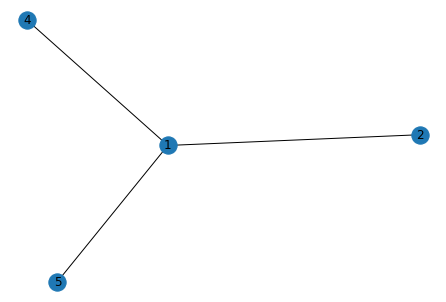

match_branches = [[1, 5]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 4], [2, 4], [2, 5], [4, 5]]
edges_to_create (resolve crossover) = [[1, 5]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 1 because skeletal distance was 1193.7975404987596 and threshold was 2500
Skipping endnode 4 because skeletal distance was 903.7019696780571 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 2], [1, 4], [2, 4], [2, 5], [4, 5]]
edges_to_create = [[1, 5]]
Number of connected components = 4
Comp 0 = {1, 5}
Comp 1 = {0, 2, 6, 7, 8, 9}
Comp 2 = {4}
Comp 3 = {3}
curr_limb_copy.deleted_edges = [[1, 2], [1, 4], [2, 4], [2, 5], [4, 5]]
curr_limb_copy.created_edges = [[1, 5]]
After get best cut: cut_edges = [[1, 2], [1, 4], [2, 4], [2, 5], [4, 5]], added_edges = [[1, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL 

  Edge: [77 71]: curr_angle = 78.35
  Edge: [71 67]: curr_angle = 45.8
  Edge: [67 69]: curr_angle = 25.8
  Edge: [ 69 111]: curr_angle = 47.68
  Edge: [111  98]: curr_angle = 130.38
  Edge: [98 92]: curr_angle = 49.52

Total time for doubling_back = 0.5398681163787842
There were 1 edges that passed doubling back threshold of 100
Winning edge [111  98] had a doubling back of 130.37840231906492
***inside resolve crossover!!!!****
coordinate_branches = [98, 110, 111]
98 = red
110 = aqua
111 = purple
Angle between 98 and 110 = 24.85 
Angle between 98 and 111 = 107.01 
Angle between 110 and 111 = 48.36 
Final Matches = [[98, 110]]
matched_branches_revised = [[98, 110]]
Original graph


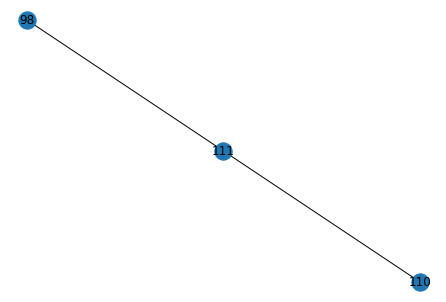

match_branches = [[98, 110]]
edges_to_delete (resolve crossover) = [[98, 111], [110, 111]]
edges_to_create (resolve crossover) = [[98, 110]]
edges_to_delete (cut_limb_network) = [array([ 98, 111]), array([110, 111])]
edges_to_create = [[98, 110]]
Number of connected components = 2
Comp 0 = {0, 2, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {1, 98, 3, 4, 6, 8, 110, 92, 93, 95}
curr_limb_copy.deleted_edges = [array([ 98, 111]), array([110, 111])]
curr_limb_copy.created_edges = [[98, 110]]
After get best cut: cut_edges = [array([ 98, 111]), array([110, 111])], added_edges = [[98, 110]]
to

  Edge: [77 83]: curr_angle = 28.58
  Edge: [83 96]: curr_angle = 72.2
  Edge: [ 96 117]: curr_angle = 79.57
  Edge: [117  99]: curr_angle = 148.83
  Edge: [ 99 100]: curr_angle = 87.42
  Edge: [100 102]: curr_angle = 16.11

Total time for doubling_back = 0.1384875774383545
There were 1 edges that passed doubling back threshold of 100
Winning edge [117  99] had a doubling back of 148.82783451049767
***inside resolve crossover!!!!****
coordinate_branches = [99, 101, 117]
99 = red
101 = aqua
117 = purple
Angle between 99 and 101 = 5.28 
Angle between 99 and 117 = 105.17 
Angle between 101 and 117 = 71.85 
Final Matches = [[99, 101]]
matched_branches_revised = [[99, 101]]
Original graph


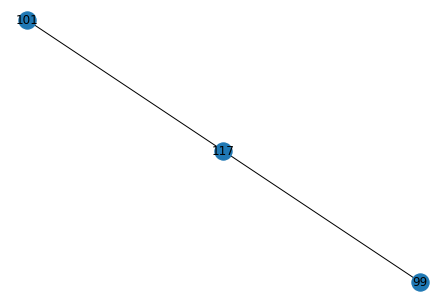

match_branches = [[99, 101]]
edges_to_delete (resolve crossover) = [[99, 117], [101, 117]]
edges_to_create (resolve crossover) = [[99, 101]]
edges_to_delete (cut_limb_network) = [array([ 99, 117]), array([101, 117])]
edges_to_create = [[99, 101]]
Number of connected components = 3
Comp 0 = {0, 2, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 90, 91, 94, 96, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {97, 99, 100, 101, 102, 103, 9, 11, 76, 80, 88, 89}
Comp 2 = {1, 98, 3, 4, 6, 8, 110, 92, 93, 95}
curr_limb_copy.deleted_edges = [array([ 98, 111]), array([110, 111]), array([ 99, 117]), array([101, 117])]
curr_limb_copy.created_edges = [[98, 110], [99, 101]]
After get best cut: cut_edges = [array([ 

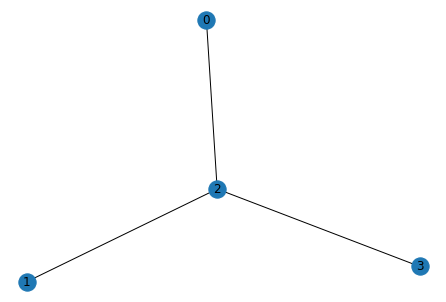

match_branches = [[0, 3], [1, 2]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 2], [1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[0, 3], [1, 2]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 2], [1, 3], [2, 3]]
edges_to_create = [[0, 3], [1, 2]]
Number of connected components = 2
Comp 0 = {1, 2}
Comp 1 = {0, 3, 4, 5, 6, 7}
curr_limb_copy.deleted_edges = [[0, 1], [0, 2], [1, 3], [2, 3]]
curr_limb_copy.created_edges = [[0, 3], [1, 2]]
After get best cut: cut_edges = [[0, 1], [0, 2], [1, 3], [2, 3]], added_edges = [[0, 3], [1, 2]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([1, 2]), array([0, 3, 4, 5, 6, 7])]


 -------- Working on limb 6--------

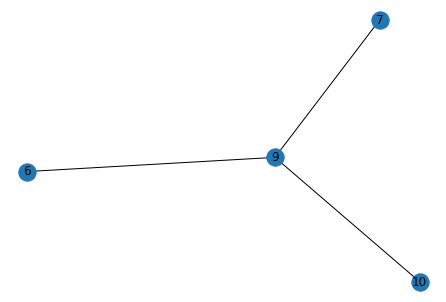

match_branches = [[7, 10], [6, 9]]
edges_to_delete (resolve crossover) = [[6, 7], [6, 10], [7, 9], [9, 10]]
edges_to_create (resolve crossover) = [[7, 10], [6, 9]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 9 because skeletal distance was 1467.6253201329482 and threshold was 2500
Skipping endnode 10 because skeletal distance was 2080.999578823185 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 7], [6, 10], [7, 9], [9, 10]]
edges_to_create = [[7, 10], [6, 9]]
Number of connected components = 3
Comp 0 = {10, 7}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 9}
Comp 2 = {8}
curr_limb_copy.deleted_edges = [[6, 7], [6, 10], [7, 9], [9, 10]]
curr_limb_copy.created_edges = [[7, 10], [6, 9]]
After get best cut: cut_edges = [[6, 7], [6, 10], [7, 9], [9, 10]], added_edges = [[7, 10], [6, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEF

  Edge: [1 9]: curr_angle = 28.55
  Edge: [ 9 15]: curr_angle = 20.11
  Edge: [15 12]: curr_angle = 11.25
  Edge: [12 20]: curr_angle = 82.16
  Edge: [20 22]: curr_angle = 11.73
  Edge: [22 24]: curr_angle = 53.27
  Edge: [24 70]: curr_angle = 152.92
  Edge: [70 63]: curr_angle = 13.31
  Edge: [63 56]: curr_angle = 47.53

Total time for doubling_back = 3.6919496059417725
There were 1 edges that passed doubling back threshold of 100
Winning edge [24 70] had a doubling back of 152.92432344995473
***inside resolve crossover!!!!****
coordinate_branches = [24, 70, 77]
24 = red
70 = aqua
77 = purple
Angle between 24 and 70 = 127.54 
Angle between 24 and 77 = 34.39 
Angle between 70 and 77 = 18.72 
Final Matches = [[24, 77], [70, 77]]
matched_branches_revised = [[70, 77]]
Original graph


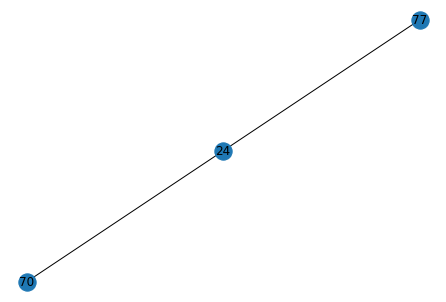

match_branches = [[70, 77]]
edges_to_delete (resolve crossover) = [[24, 70], [24, 77]]
edges_to_create (resolve crossover) = [[70, 77]]
edges_to_delete (cut_limb_network) = [array([24, 70]), array([24, 77])]
edges_to_create = [[70, 77]]
Number of connected components = 2
Comp 0 = {23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 86, 87, 88, 89, 90, 91, 92, 93}
curr_limb_copy.deleted_edges = [array([24, 70]), array([24, 77])]
curr_limb_copy.created_edges = [[70, 77]]
After get best cut: cut_edges = [array([24, 70]), array([24, 77])], added_edges = [[70, 77]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

  Edge: [56 61]: curr_angle = 38.13
  Edge: [61 58]: curr_angle = 32.2
  Edge: [58 60]: curr_angle = 64.21
  Edge: [60 71]: curr_angle = 38.24
  Edge: [71 76]: curr_angle = 26.39
  Edge: [76 74]: curr_angle = 43.65
  Edge: [74 68]: curr_angle = 28.36

Total time for doubling_back = 0.5138521194458008

Attempting the width jump check (attempting from both sides)
  Edge: [56 61]: jump = -674.72
  Edge: [61 58]: jump = -535.33
  Edge: [58 60]: jump = -153.48
  Edge: [60 71]: jump = -56.63
  Edge: [71 76]: jump = 151.98
  Edge: [76 74]: jump = 74.3
  Edge: [74 68]: jump = 261.68
Adding error edge [74 68] because width jump was 261.6839991279519
Total time for width = 0.7316799163818359
Path starting at 56 had err_edges: [[74, 68]]
  Edge: [68 74]: jump = -261.68
  Edge: [74 76]: jump = -74.3
  Edge: [76 71]: jump = -151.98
  Edge: [71 60]: jump = 56.63
  Edge: [60 58]: jump = 153.48
  Edge: [58 61]: jump = 247.17
Adding error edge [58 61] because width jump was 247.17086902549568
  Edge: [

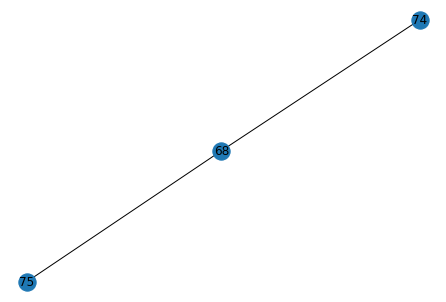

match_branches = [[68, 75]]
edges_to_delete (resolve crossover) = [[68, 74], [74, 75]]
edges_to_create (resolve crossover) = [[68, 75]]
edges_to_delete (cut_limb_network) = [array([68, 74]), array([74, 75])]
edges_to_create = [[68, 75]]
Number of connected components = 3
Comp 0 = {23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 86, 87, 88, 89, 90, 91, 92, 93}
Comp 2 = {80, 75, 68, 79}
curr_limb_copy.deleted_edges = [array([24, 70]), array([24, 77]), array([68, 74]), array([74, 75])]
curr_limb_copy.created_edges = [[70, 77], [68, 75]]
After get best cut: cut_edges = [array([68, 74]), array([74, 75])], added_edges = [[68, 75]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total 

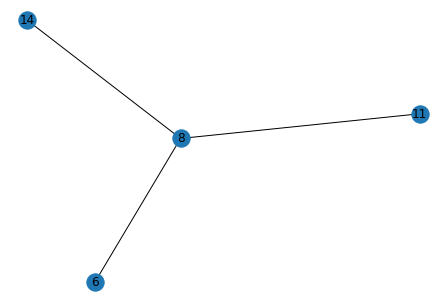

match_branches = [[6, 8]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]]
edges_to_create (resolve crossover) = [[6, 8]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]]
edges_to_create = [[6, 8]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
Comp 1 = {10, 2, 11}
Comp 2 = {14}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]]
curr_limb_copy.created_edges = [[6, 8]]
After get best cut: cut_edges = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]], added_edges = [[6, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
Shortest path = [23, 25, 26, 13, 6, 8, 19, 22, 16, 24]

 --------

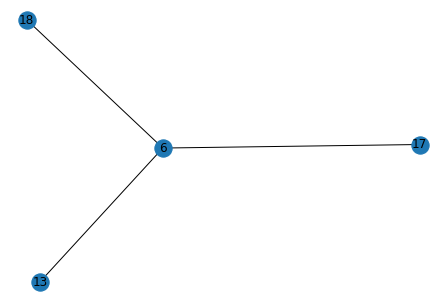

match_branches = [[6, 17]]
edges_to_delete (resolve crossover) = [[6, 13], [6, 18], [13, 17], [13, 18], [17, 18]]
edges_to_create (resolve crossover) = [[6, 17]]
curr_limb.deleted_edges 5 =[[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 13], [6, 18], [13, 17], [13, 18], [17, 18]]
edges_to_create = [[6, 17]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 12, 16, 17, 19, 20, 21, 22, 24}
Comp 1 = {10, 2, 11}
Comp 2 = {14}
Comp 3 = {13, 15, 23, 25, 26, 27, 28, 29, 30}
Comp 4 = {18}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14], [6, 13], [6, 18], [13, 17], [13, 18], [17, 18]]
curr_limb_copy.created_edges = [[6, 8], [6, 17]]
After get best cut: cut_edges = [[6, 13], [6, 18], [13, 17], [13, 18], [17, 18]], added_edges = [[6, 17]]
total_soma_paths_to_cut = [[6, 11], [6, 14], [8, 11], [8, 14], [11, 14]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the

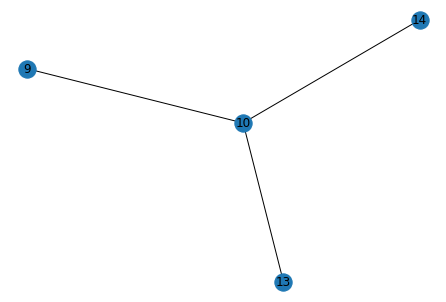

match_branches = [[9, 14], [10, 13]]
edges_to_delete (resolve crossover) = [[9, 10], [9, 13], [10, 14], [13, 14]]
edges_to_create (resolve crossover) = [[9, 14], [10, 13]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 15 because skeletal distance was 890.6406768235719 and threshold was 2500
skip_nodes = [15]
edges_to_delete (cut_limb_network) = [[9, 10], [9, 13], [10, 14], [13, 14]]
edges_to_create = [[9, 14], [10, 13]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Comp 1 = {12}
curr_limb_copy.deleted_edges = [[9, 10], [9, 13], [10, 14], [13, 14]]
curr_limb_copy.created_edges = [[9, 14], [10, 13]]
After get best cut: cut_edges = [[9, 10], [9, 13], [10, 14], [13, 14]], added_edges = [[9, 14], [10, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIR

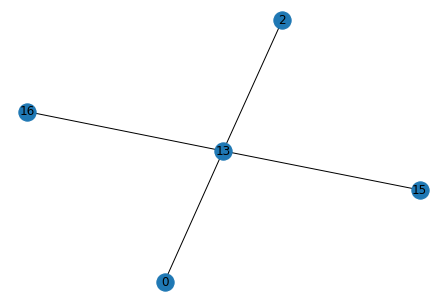

match_branches = [[0, 16]]
edges_to_delete (resolve crossover) = [[0, 2], [0, 13], [0, 15], [2, 13], [2, 15], [2, 16], [13, 15], [13, 16], [15, 16]]
edges_to_create (resolve crossover) = [[0, 16]]
curr_limb.deleted_edges 5 =[[9, 10], [9, 13], [10, 14], [13, 14]]
Skipping endnode 15 because skeletal distance was 890.6406768235719 and threshold was 2500
skip_nodes = [15]
edges_to_delete (cut_limb_network) = [[0, 2], [0, 13], [0, 15], [2, 13], [2, 15], [2, 16], [13, 15], [13, 16], [15, 16]]
edges_to_create = [[0, 16]]
Number of connected components = 5
Comp 0 = {15}
Comp 1 = {0, 1, 4, 9, 14, 16, 17}
Comp 2 = {2}
Comp 3 = {3, 5, 6, 7, 8, 10, 11, 13, 18, 19, 20, 21, 22, 23}
Comp 4 = {12}
curr_limb_copy.deleted_edges = [[9, 10], [9, 13], [10, 14], [13, 14], [0, 2], [0, 13], [0, 15], [2, 13], [2, 15], [2, 16], [13, 15], [13, 16], [15, 16]]
curr_limb_copy.created_edges = [[9, 14], [10, 13], [0, 16]]
After get best cut: cut_edges = [[0, 2], [0, 13], [0, 15], [2, 13], [2, 15], [2, 16], [13, 15],

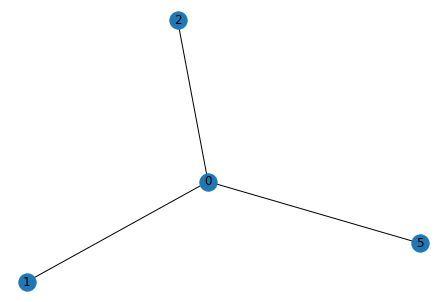

match_branches = []
edges_to_delete (resolve crossover) = [[0, 1], [0, 2], [0, 5], [1, 2], [1, 5], [2, 5]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 0 because skeletal distance was 1593.2065537670073 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 2], [0, 5], [1, 2], [1, 5], [2, 5]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0}
Comp 1 = {1}
Comp 2 = {2, 3, 8, 11, 12, 13, 14}
Comp 3 = {5, 6, 7, 9, 10}
Comp 4 = {4}
curr_limb_copy.deleted_edges = [[0, 1], [0, 2], [0, 5], [1, 2], [1, 5], [2, 5]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[0, 1], [0, 2], [0, 5], [1, 2], [1, 5], [2, 5]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER D

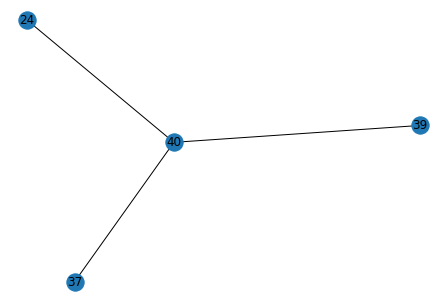

match_branches = [[37, 40]]
edges_to_delete (resolve crossover) = [[24, 37], [24, 39], [24, 40], [37, 39], [39, 40]]
edges_to_create (resolve crossover) = [[37, 40]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 46 because skeletal distance was 1768.0347298239835 and threshold was 2500
Skipping endnode 87 because skeletal distance was 226.23960923221856 and threshold was 2500
skip_nodes = [46, 87]
edges_to_delete (cut_limb_network) = [[24, 37], [24, 39], [24, 40], [37, 39], [39, 40]]
edges_to_create = [[37, 40]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 

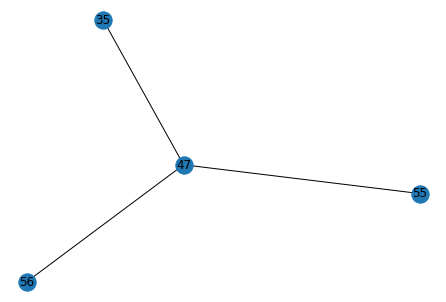

match_branches = []
edges_to_delete (resolve crossover) = [[35, 47], [35, 55], [35, 56], [47, 55], [47, 56], [55, 56]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[24, 37], [24, 39], [24, 40], [37, 39], [39, 40]]
Skipping endnode 46 because skeletal distance was 1768.0347298239835 and threshold was 2500
Skipping endnode 87 because skeletal distance was 226.23960923221856 and threshold was 2500
skip_nodes = [46, 87]
edges_to_delete (cut_limb_network) = [[35, 47], [35, 55], [35, 56], [47, 55], [47, 56], [55, 56]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 22, 33, 34, 36, 41, 42, 48, 51, 52, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125}
Comp 1 =

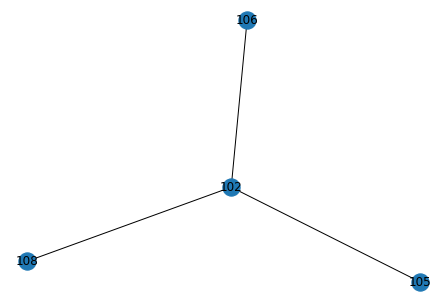

match_branches = [[105, 106], [102, 108]]
edges_to_delete (resolve crossover) = [[102, 105], [102, 106], [105, 108], [106, 108]]
edges_to_create (resolve crossover) = [[105, 106], [102, 108]]
curr_limb.deleted_edges 5 =[[24, 37], [24, 39], [24, 40], [37, 39], [39, 40], [35, 47], [35, 55], [35, 56], [47, 55], [47, 56], [55, 56]]
Skipping endnode 87 because skeletal distance was 226.23960923221856 and threshold was 2500
Skipping endnode 120 because skeletal distance was 823.5553178935543 and threshold was 2500
skip_nodes = [87, 120]
edges_to_delete (cut_limb_network) = [[102, 105], [102, 106], [105, 108], [106, 108]]
edges_to_create = [[105, 106], [102, 108]]
Number of connected components = 8
Comp 0 = {7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 22, 33, 34, 36, 41, 42, 48, 51, 52, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 

  Edge: [84 85]: curr_angle = 16.91
  Edge: [85 99]: curr_angle = 12.91
  Edge: [ 99 106]: curr_angle = 164.2
  Edge: [106 105]: curr_angle = 14.97
  Edge: [105 110]: curr_angle = 42.04
  Edge: [110 114]: curr_angle = 20.48
  Edge: [114 115]: curr_angle = 20.94

Total time for doubling_back = 0.7436118125915527
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 99 106] had a doubling back of 164.20445310686588
***inside resolve crossover!!!!****
coordinate_branches = [99, 103, 106]
99 = red
103 = aqua
106 = purple
Angle between 99 and 103 = 14.58 
Angle between 99 and 106 = 153.38 
Angle between 103 and 106 = 12.08 
Final Matches = [[99, 103], [103, 106]]
matched_branches_revised = [[103, 106]]
Original graph


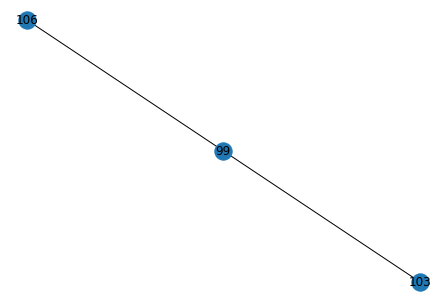

match_branches = [[103, 106]]
edges_to_delete (resolve crossover) = [[99, 103], [99, 106]]
edges_to_create (resolve crossover) = [[103, 106]]
edges_to_delete (cut_limb_network) = [array([ 99, 103]), array([ 99, 106])]
edges_to_create = [[103, 106]]
Number of connected components = 9
Comp 0 = {7, 9, 12, 15, 17, 21, 22, 34, 41, 42, 55, 58, 59, 62, 63, 67, 68, 74, 75, 76, 77, 78, 80, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125}
Comp 1 = {10, 13, 16, 18, 19, 33, 36, 48, 51, 52, 54, 60, 61, 64, 65, 66, 69, 70, 71, 72, 73, 79, 81, 82, 83, 84, 85, 86, 87, 99, 102, 108}
Comp 2 = {35}
Comp 3 = {0, 1, 2, 5, 8, 11, 20, 23, 25, 26, 27, 28, 29, 30, 31, 32, 37, 40, 43, 44, 45, 46, 47, 49, 50, 57}
Comp 4 = {56}
Comp 5 = {3, 4, 6, 14, 24}
Comp 6 = {39}
Comp 7 = {38}
Comp 8 = {53}
curr_limb_copy.deleted_edges = [[24, 37], [24, 39], [24, 40], [37, 39], [39, 40], [35, 47], [35, 55], [35,

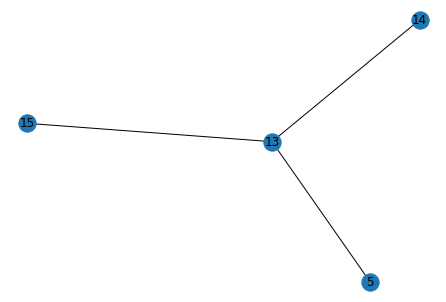

match_branches = [[5, 15]]
edges_to_delete (resolve crossover) = [[5, 13], [5, 14], [13, 14], [13, 15], [14, 15]]
edges_to_create (resolve crossover) = [[5, 15]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 13], [5, 14], [13, 14], [13, 15], [14, 15]]
edges_to_create = [[5, 15]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 15, 16, 17}
Comp 1 = {0, 1, 7, 8, 9, 10, 11, 12, 13}
Comp 2 = {14}
curr_limb_copy.deleted_edges = [[5, 13], [5, 14], [13, 14], [13, 15], [14, 15]]
curr_limb_copy.created_edges = [[5, 15]]
After get best cut: cut_edges = [[5, 13], [5, 14], [13, 14], [13, 15], [14, 15]], added_edges = [[5, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [ar

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")